In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
%matplotlib inline

import matplotlib.dates as mdates
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [2]:
def trade(data, tick, stock_type):
    # Momentum stock suggest sell all when 10~15% profit.
    # Value stock suggest sell all when 5~7.5% profit.
    if stock_type == "Momentum":
        book_rate = 1.15
    elif stock_type == "Value":
        book_rate = 1.07
    else:
        print("input error")
        return
    
    EMA8 = data["Close"].ewm(span=8, adjust=False).mean()
    EMA21 = data["Close"].ewm(span=21, adjust=False).mean()
    MA50 = data["Close"].rolling(window=50).mean()

    start_date = '2015-09-08'
    end_date = '2020-09-04'

    plt.figure(figsize=(30,15))

    line1 = plt.plot(data['Close'])
    line2 = plt.plot(EMA8)
    line3 = plt.plot(EMA21)
    line4 = plt.plot(MA50)

    plt.legend(['Price', 'EMA8', 'EMA21', 'MA50'], loc='upper left')
    plt.title(tick)

    plt.show()

    hold = 0
    value = 0
    cost = 0
    stop = 0
    cash = 100000
    shares = 0
    first = 1
    first_price = 0
    first_share = 0
    first_cash = 0

    buy_count = 0
    stop_count = 0
    book_count = 0

    price = data['Close'].values
    ema8 = EMA8.values
    ema21 = EMA21.values
    ma50 = MA50.values
    low = data['Low'].values
    high = data['High'].values

    for i in range(49, len(price)):
        # if has position
        if hold:
            # if stop loss
            if price[i] <= stop:
                cash += shares * price[i]
                shares = 0
                value = 0
                hold = 0
                stop = 0
                cost = 0
#                 print(i, "stop", price[i], "value", value, "cost", cost, "stop", stop, "shares", shares, "cash", cash)
#             if book profit
            elif value >= cost * book_rate:
                cash += shares * price[i]
                shares = 0
                value = 0
                hold = 0
                stop = 0
                cost = 0
#                 print(i, "book", price[i], "value", value, "cost", cost, "stop", stop, "shares", shares, "cash", cash)
#             update value and continue holding
            else:
                value = price[i] * shares
                continue
#         if no position
        else:
#             long, seeking for entry
            if ema8[i] > ema21[i] > ma50[i]:
                # reversal
                if low[i-2] > low[i-1] and low[i-1] < low[i]:
                    # drawback to ema21, buy dip
                    if low[i-1] <= ema21[i-1]:
                        hold = 1
                        shares = cash // price[i]
                        value = shares * price[i]
                        cash -= value
                        cost = price[i] * shares
                        stop = low[i-1]
                        if first:
                            first = 0
                            first_price = price[i]
                            first_share = shares
                            first_cash = cash
#                         print(i, "entry", price[i], "value", value, "cost", cost, "stop", stop, "shares", shares, "cash", cash)
            #  short, ignore
            else:
                continue

    print("Active Short Term: ", (cash + shares*price[-1]).round(2), " Initial Fund: ", 100000)
    print("Buy and Hold: ", first_cash + price[-1]*first_share)
    
    x = ['Active', 'Hold', 'Initial']
    num = [(cash + shares*price[-1]).round(2), first_cash + price[-1]*first_share, 100000]

    x_pos = [i for i, _ in enumerate(x)]

    plt.bar(x_pos, num, color='blue')
    plt.xticks(x_pos, x)
    plt.show()
    

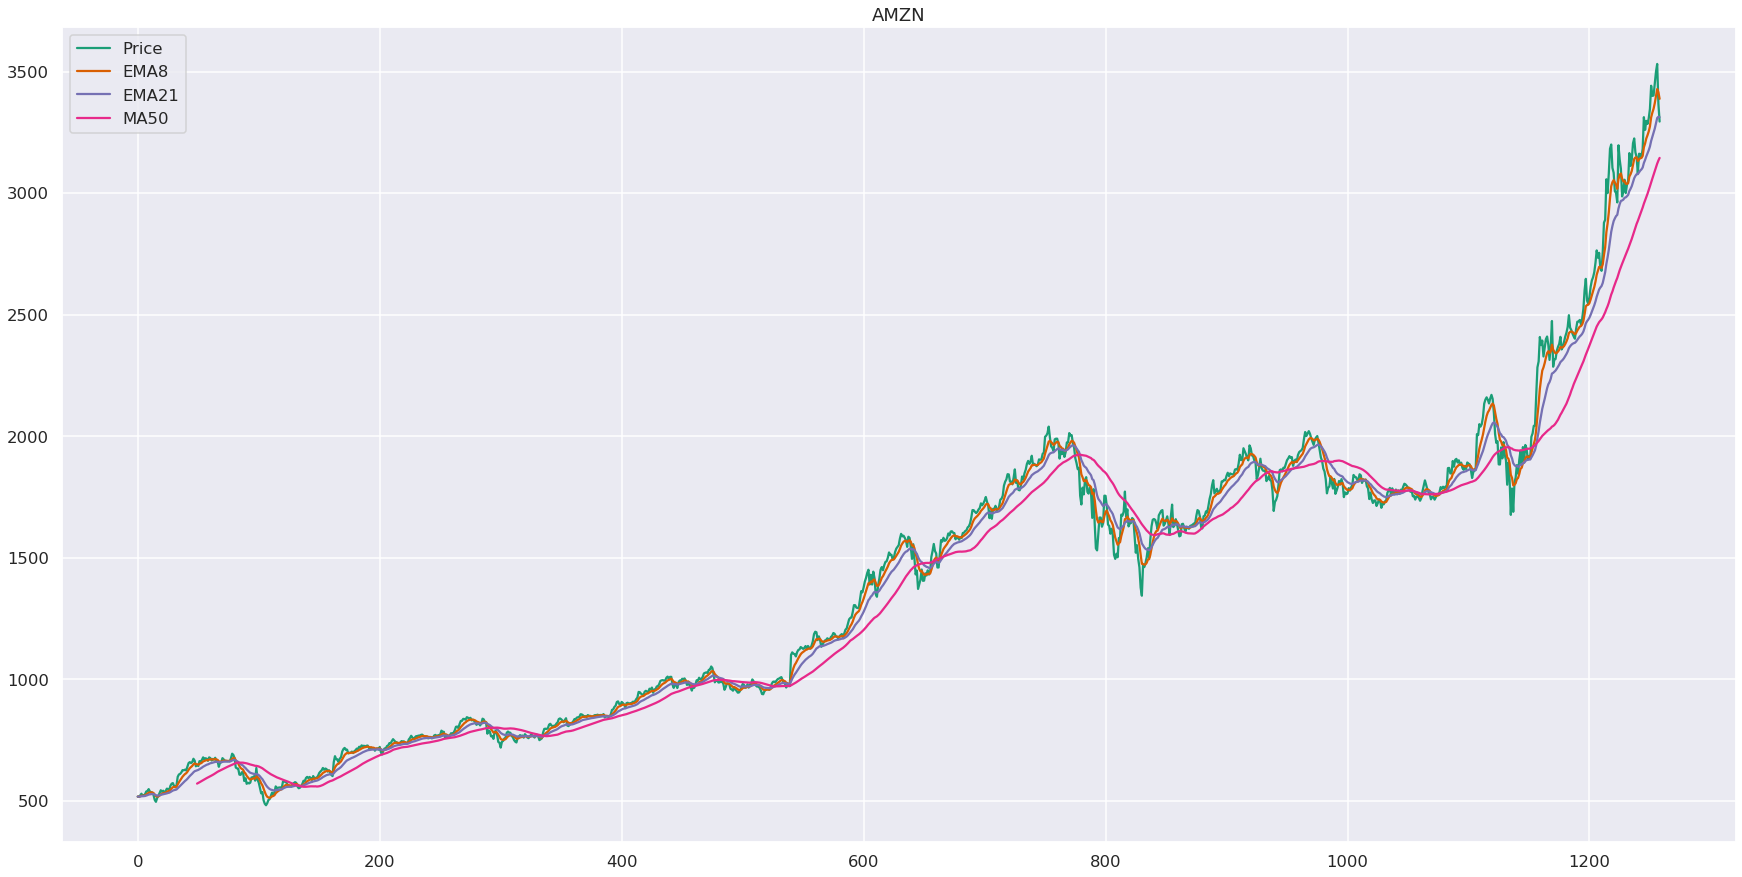

Active Short Term:  328870.64  Initial Fund:  100000
Buy and Hold:  510954.6199950001


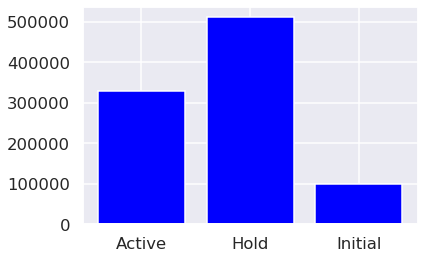

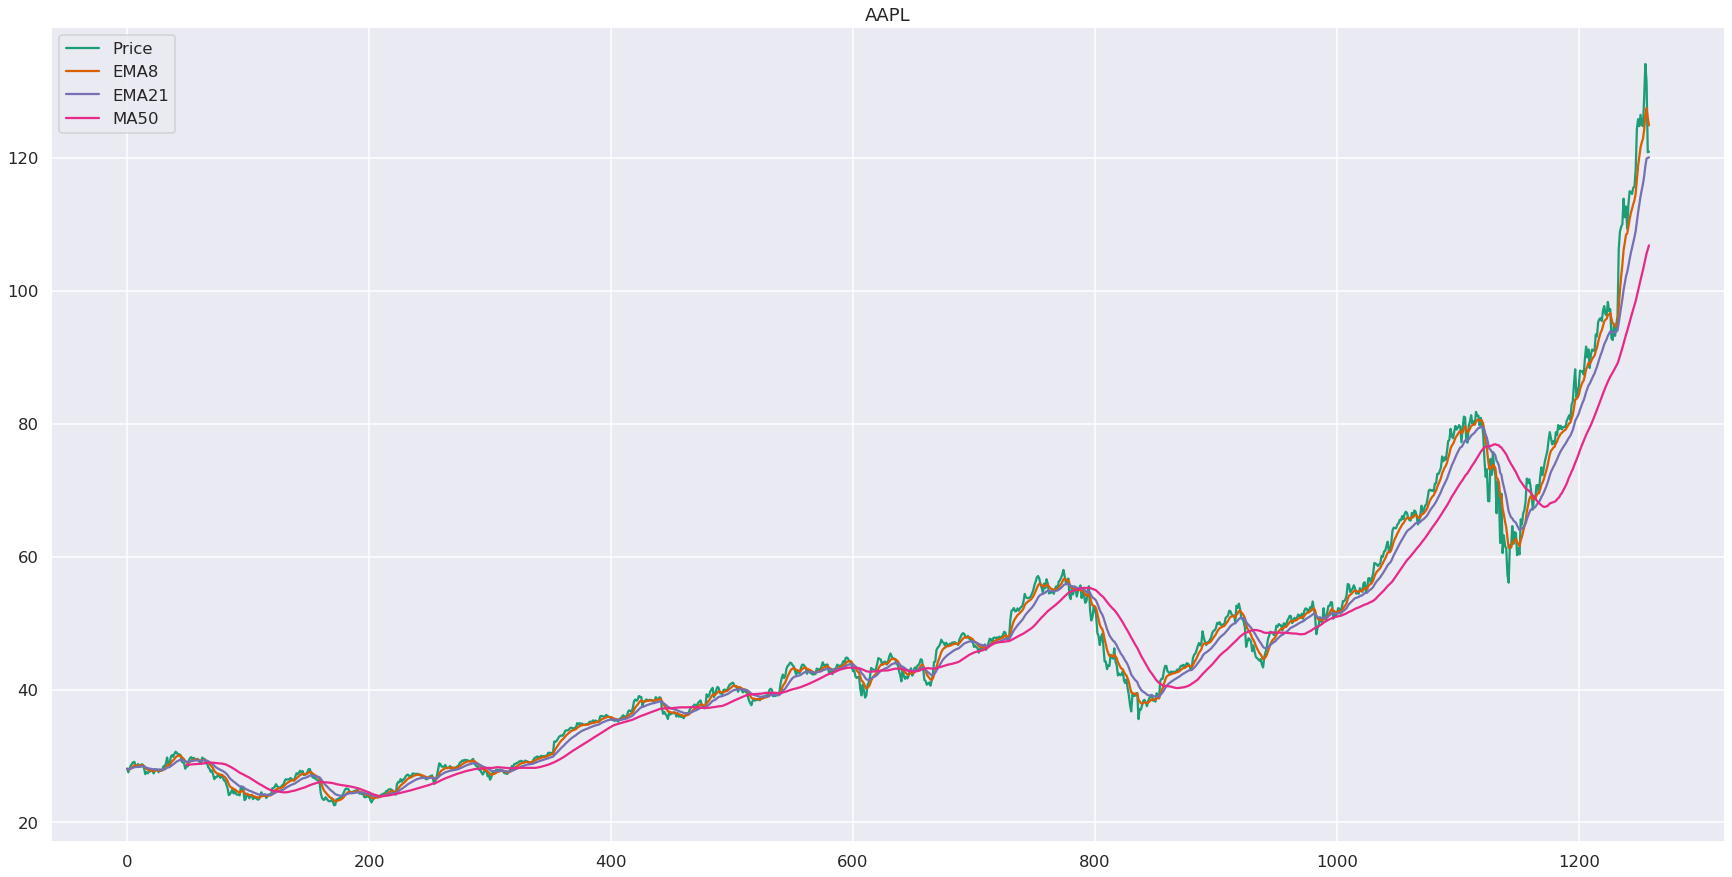

Active Short Term:  213660.47  Initial Fund:  100000
Buy and Hold:  409841.066612


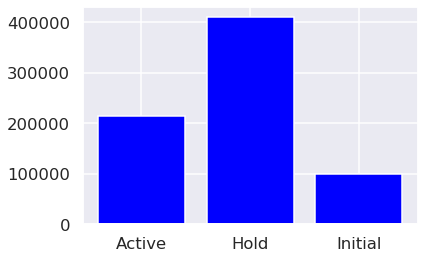

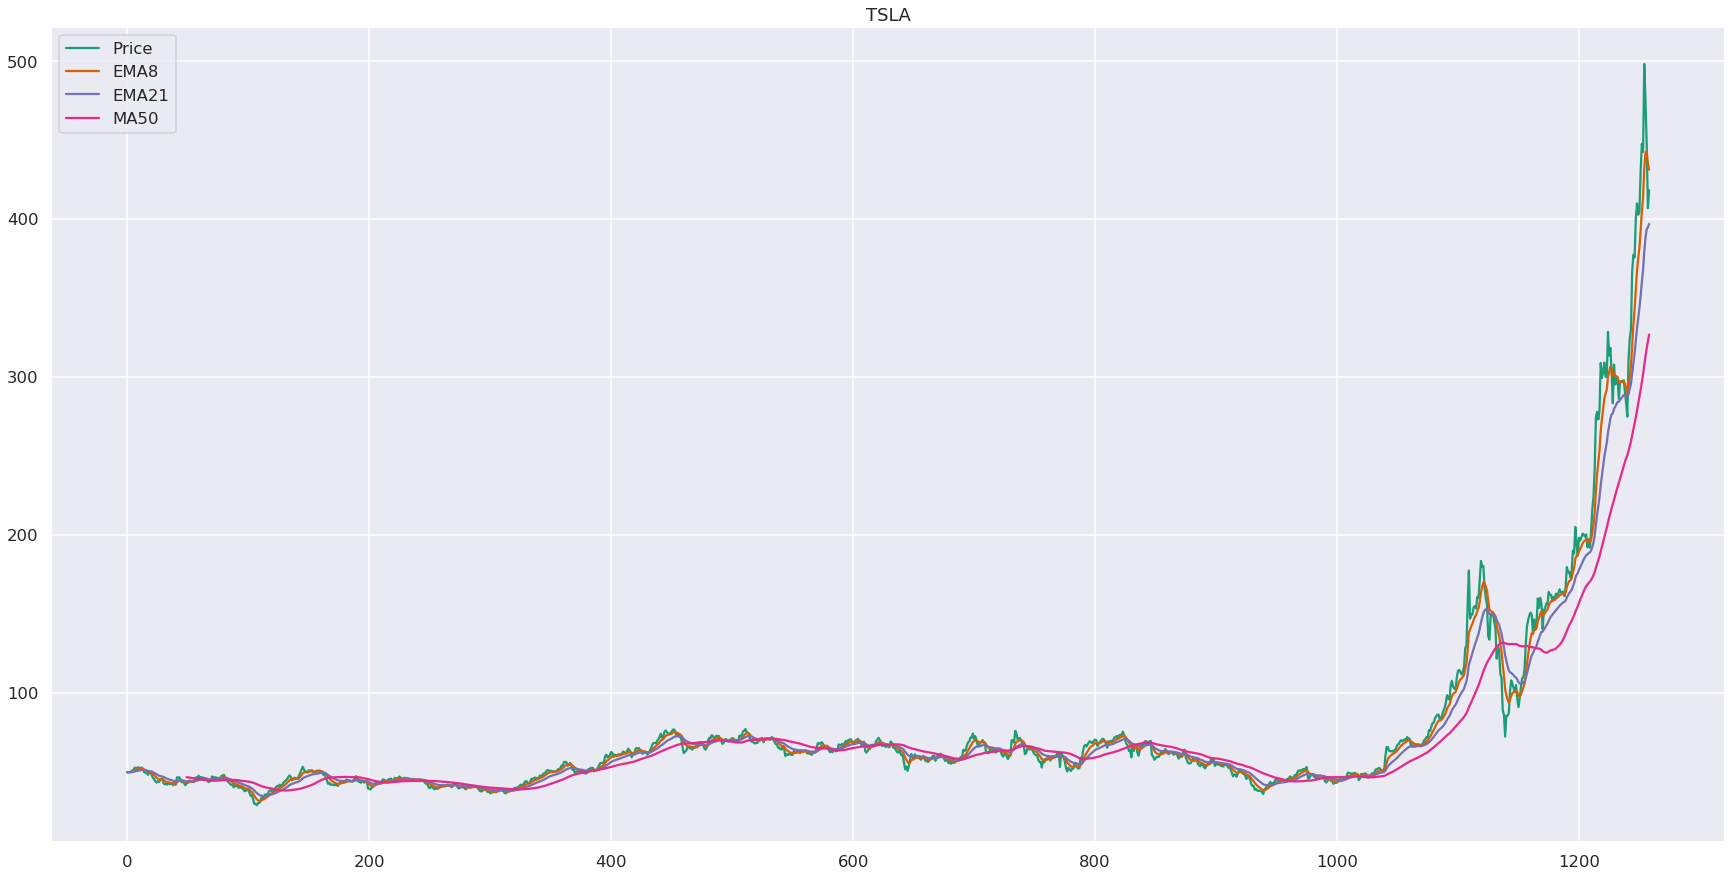

Active Short Term:  146472.32  Initial Fund:  100000
Buy and Hold:  920766.1192059999


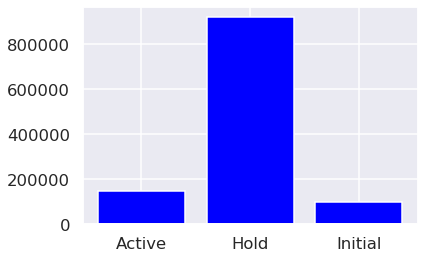

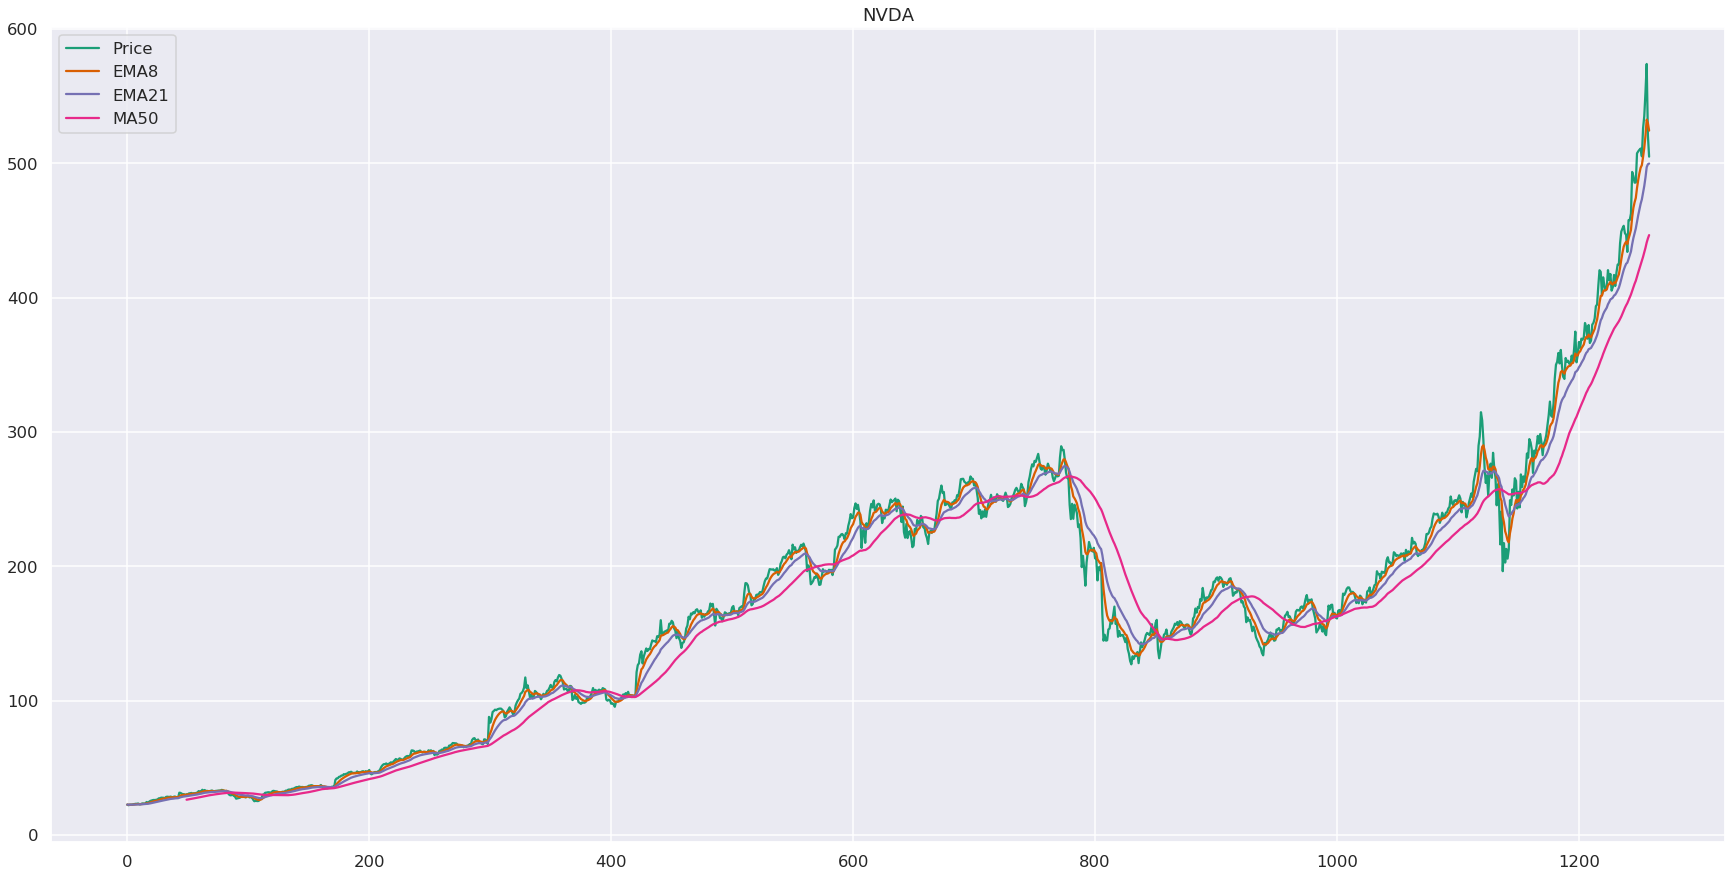

Active Short Term:  398767.38  Initial Fund:  100000
Buy and Hold:  1534407.9756880002


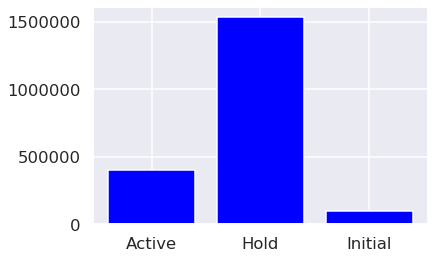

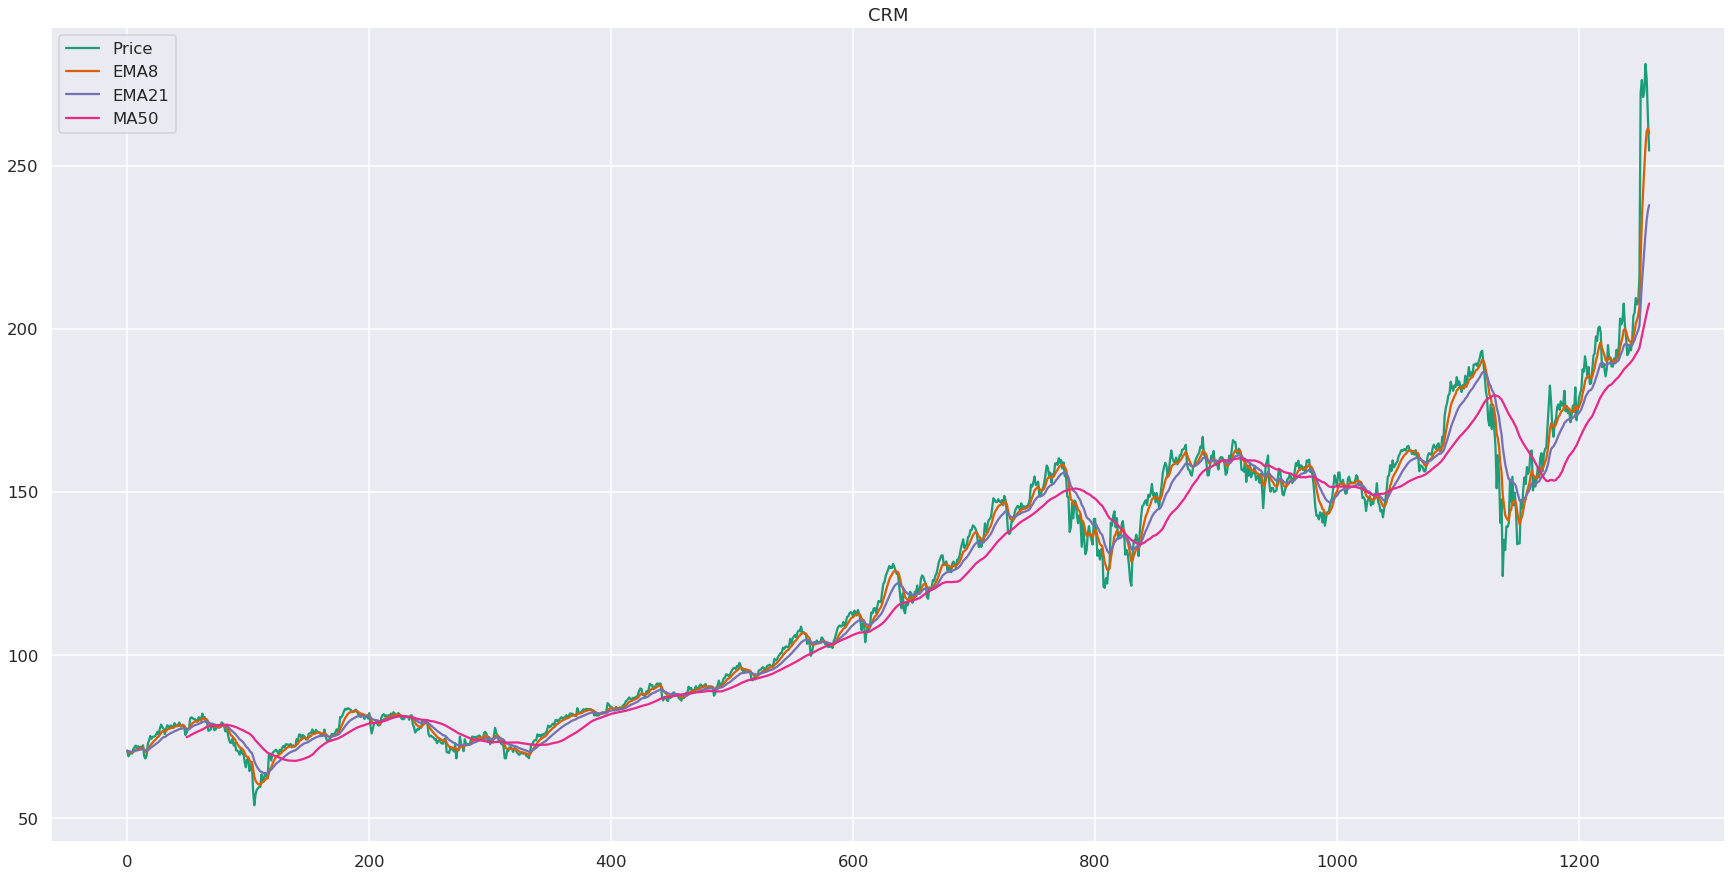

Active Short Term:  276144.23  Initial Fund:  100000
Buy and Hold:  329633.23870600003


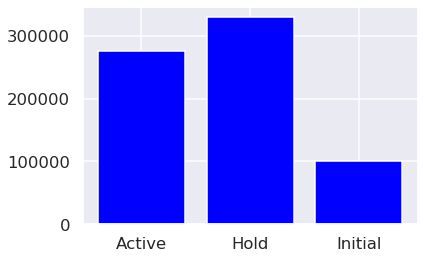

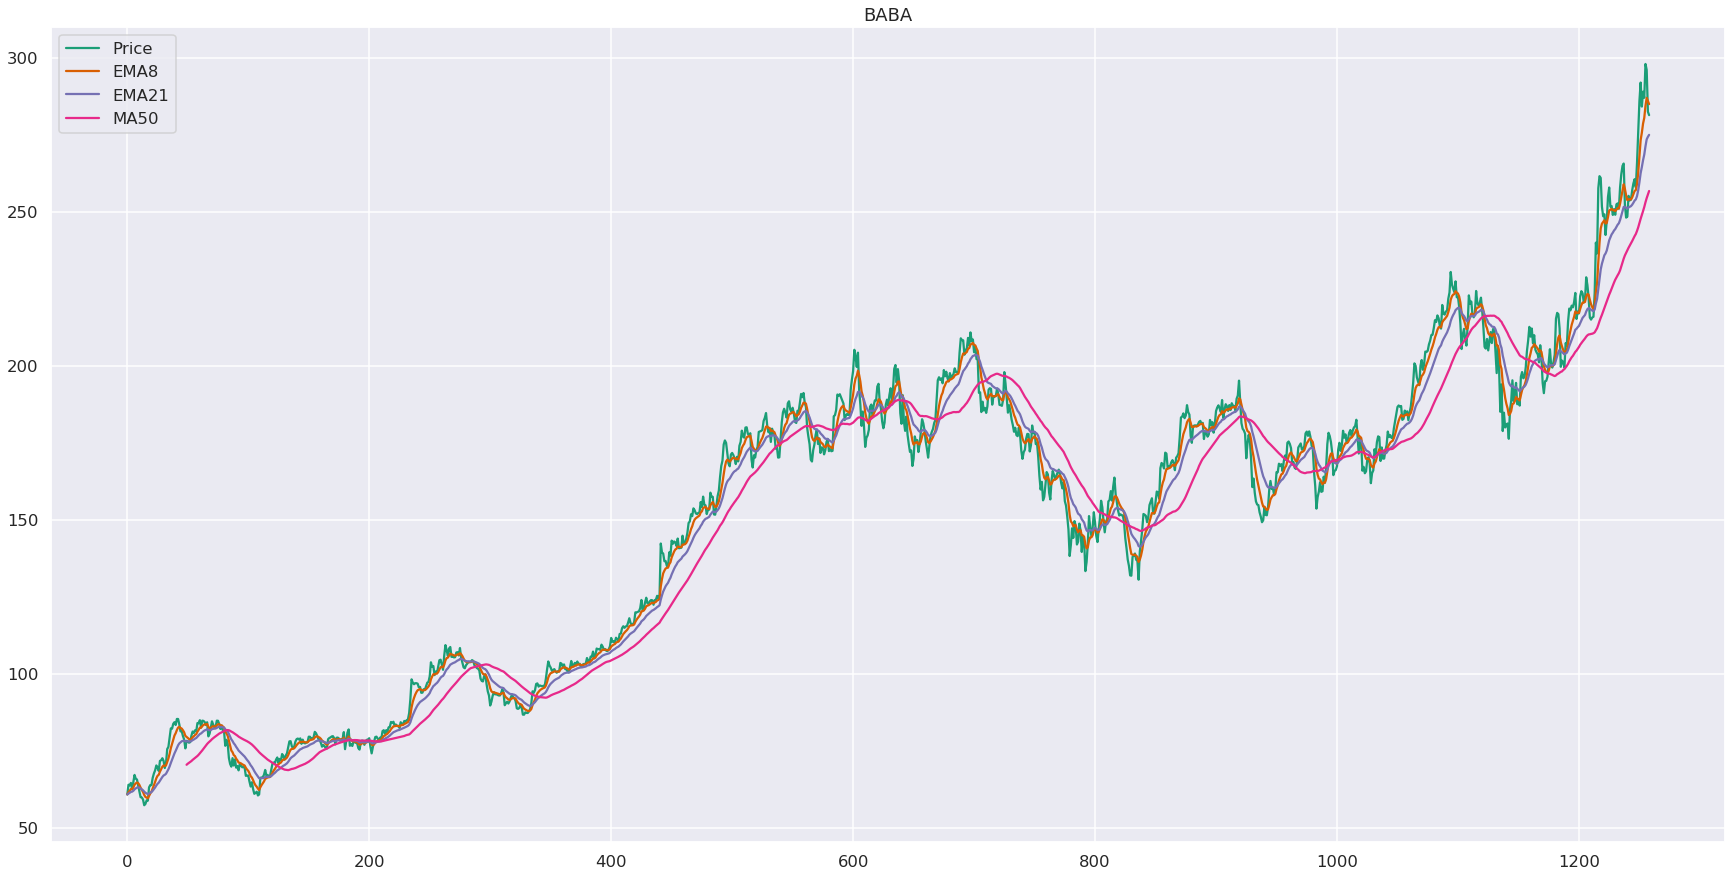

Active Short Term:  204205.73  Initial Fund:  100000
Buy and Hold:  359345.94532400003


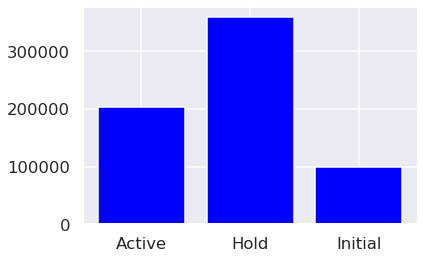

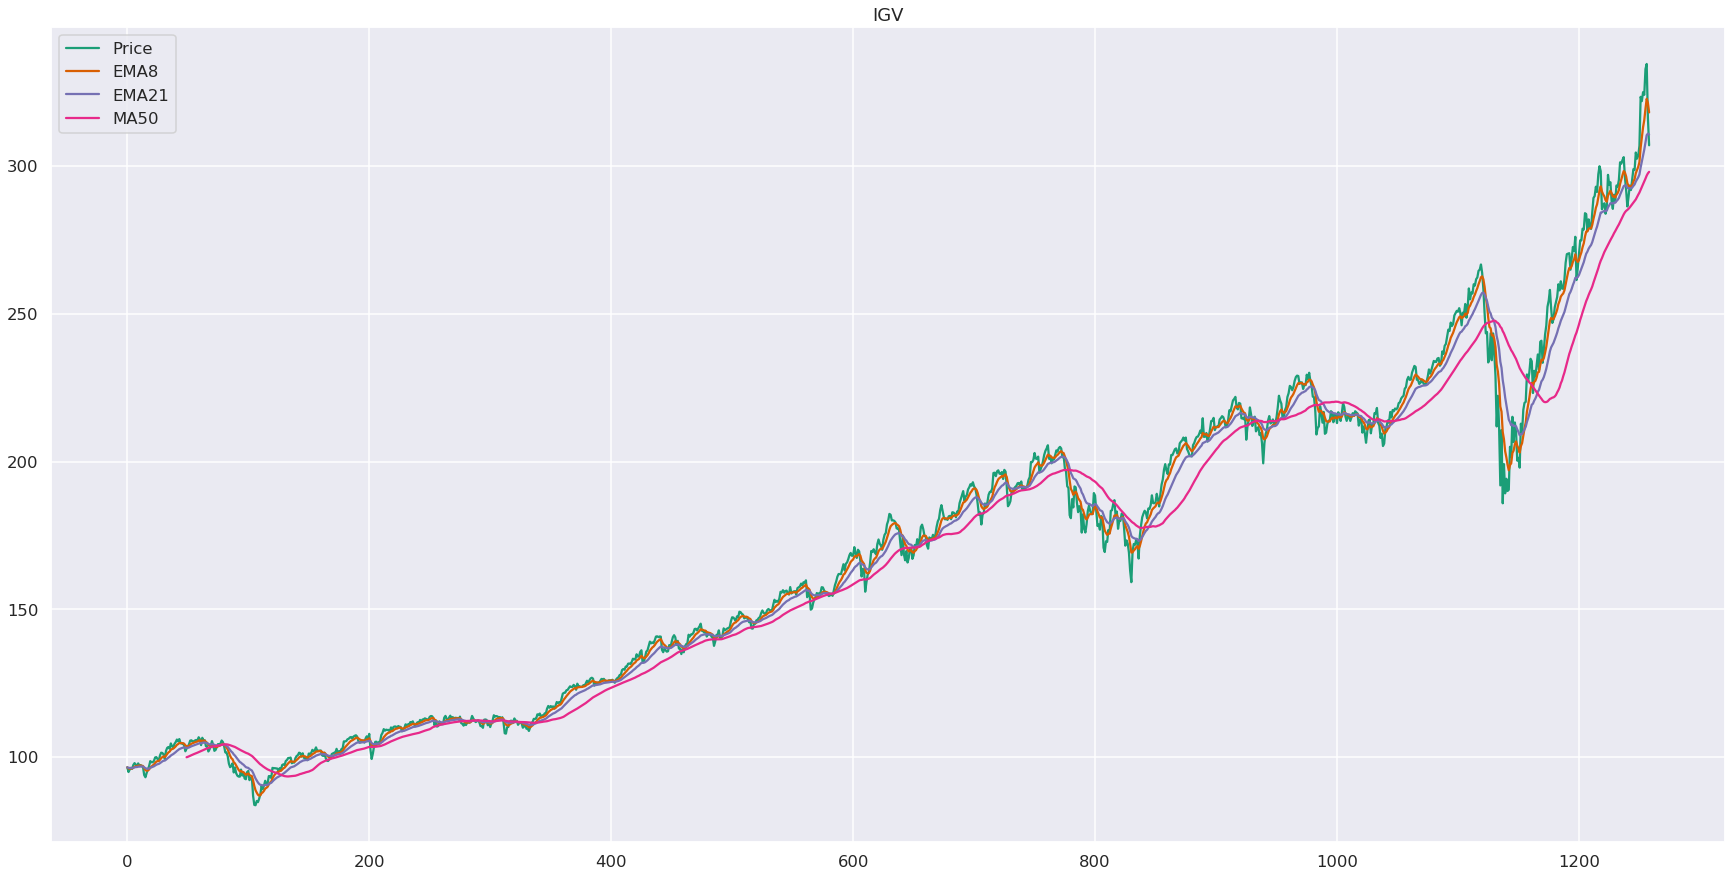

Active Short Term:  162387.28  Initial Fund:  100000
Buy and Hold:  296648.627728


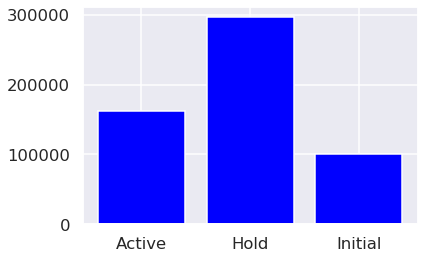

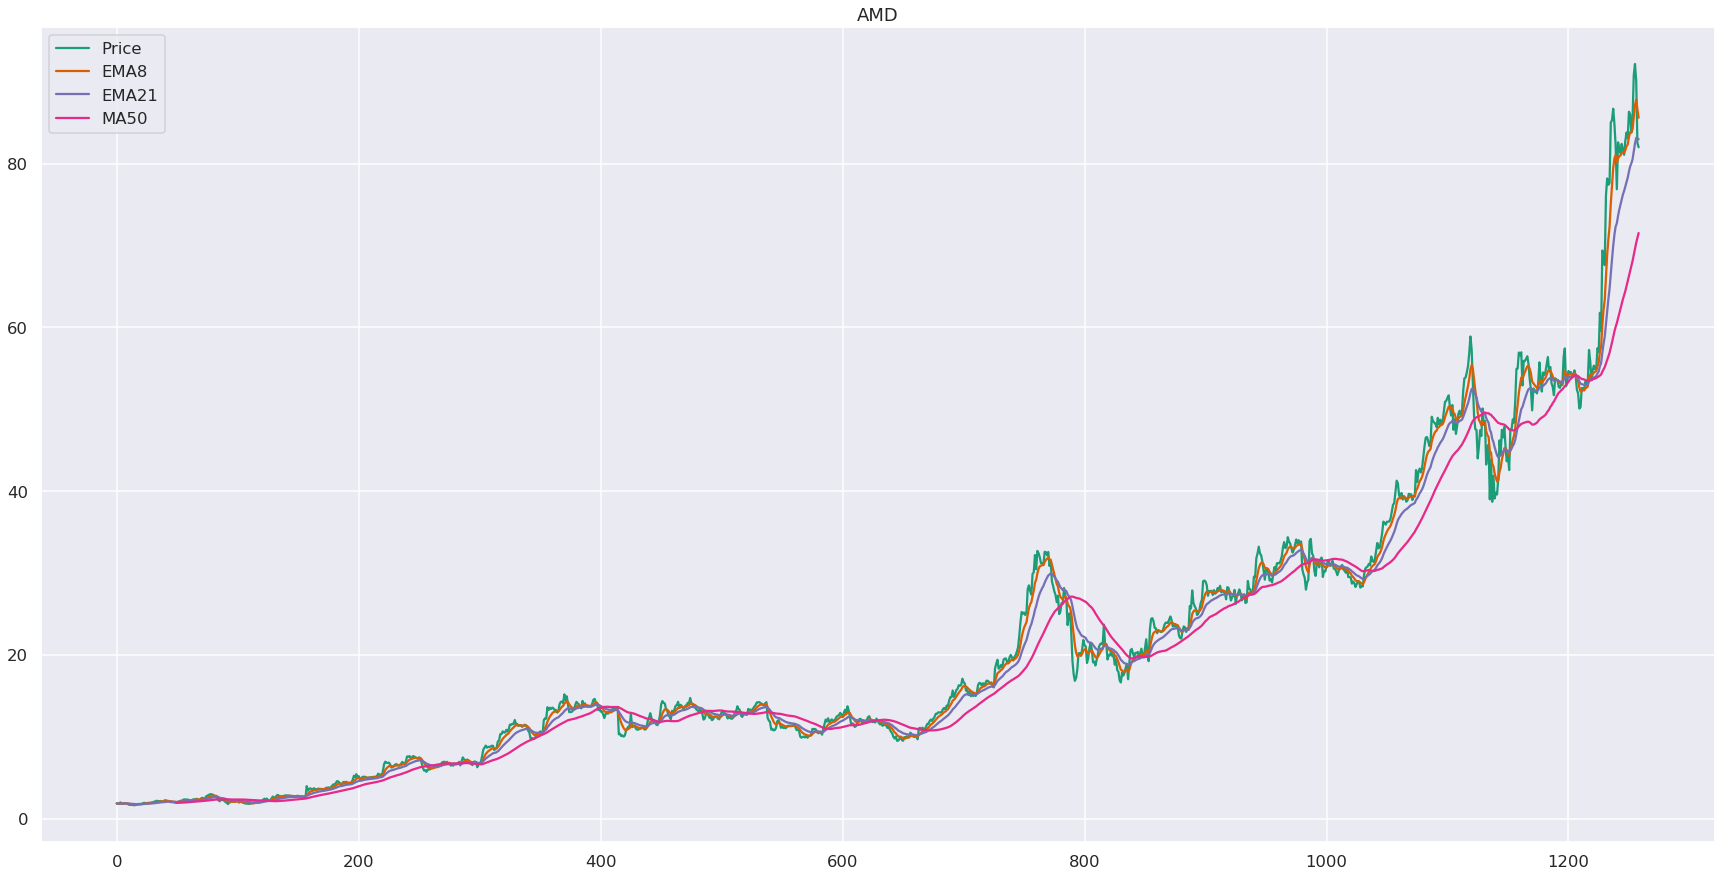

Active Short Term:  303820.12  Initial Fund:  100000
Buy and Hold:  3596878.157718


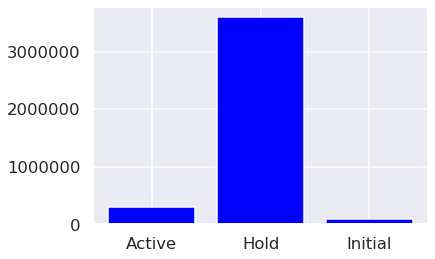

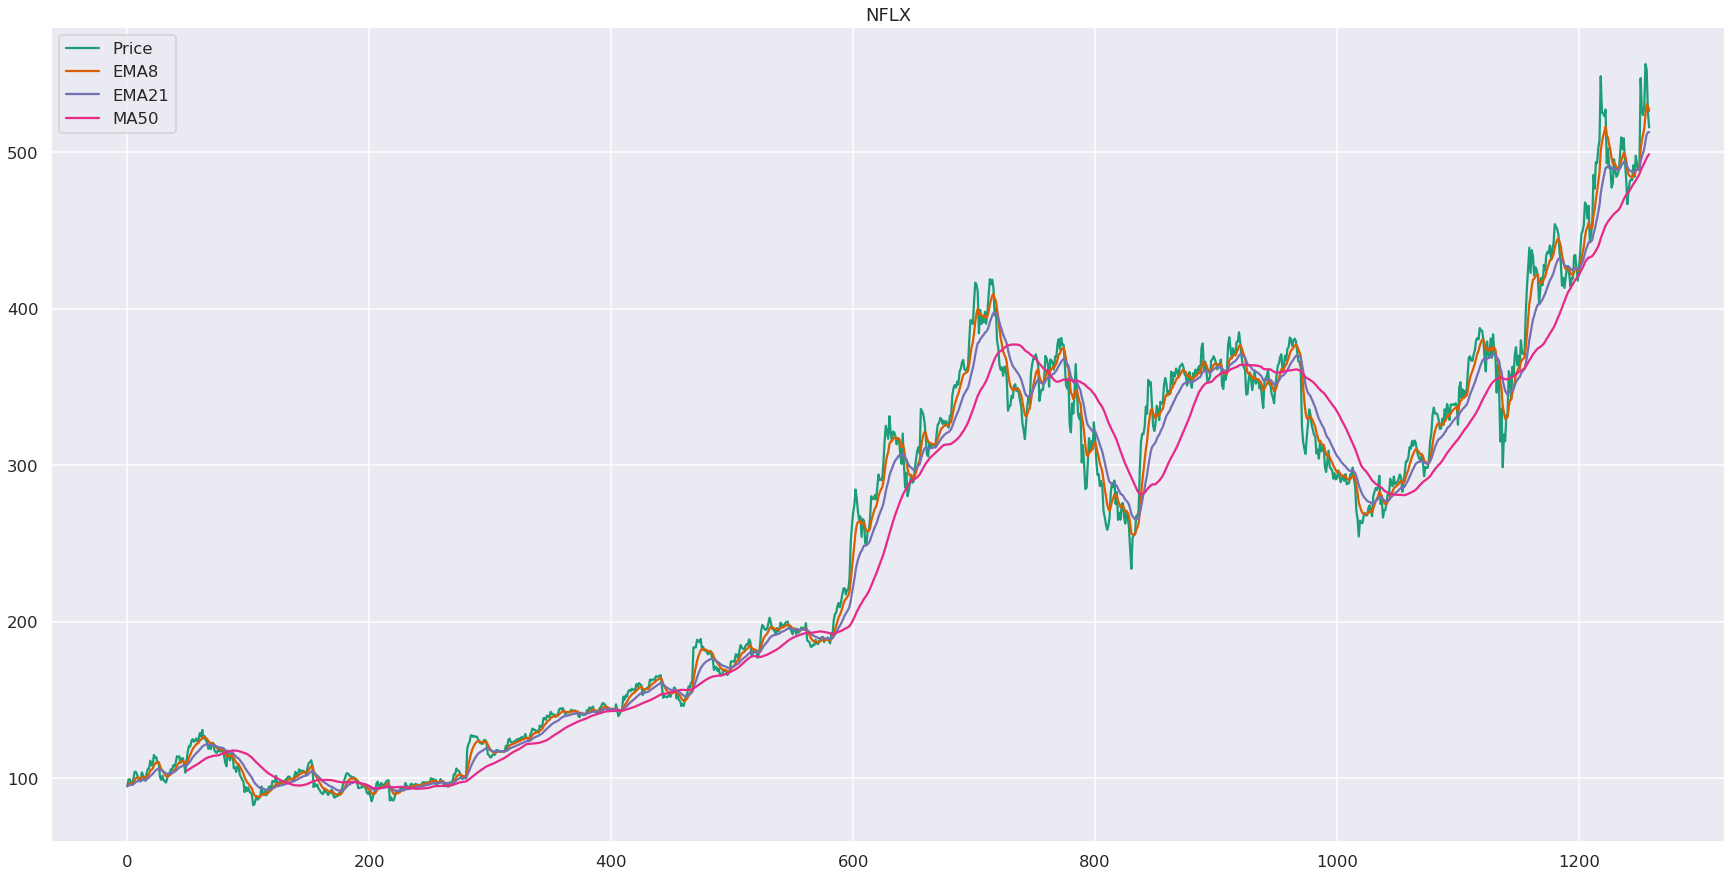

Active Short Term:  137579.07  Initial Fund:  100000
Buy and Hold:  440304.34147


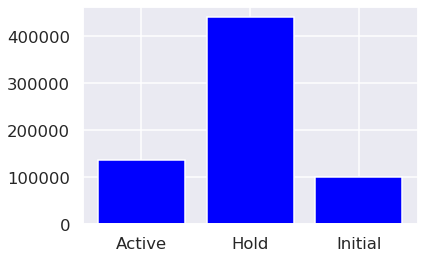

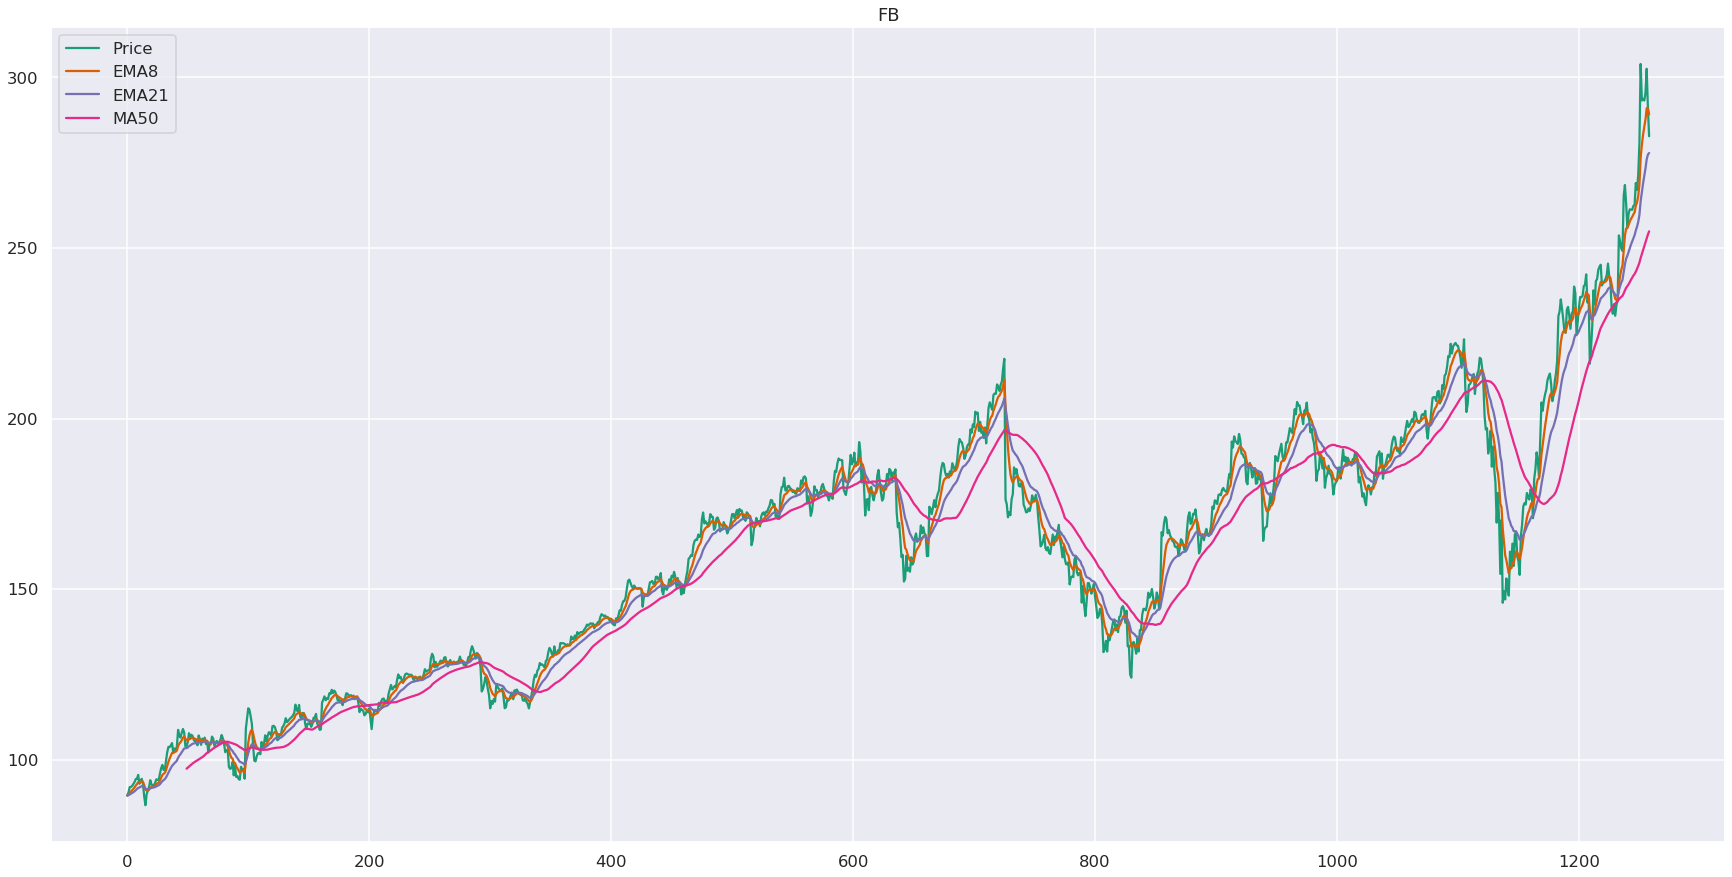

Active Short Term:  152266.54  Initial Fund:  100000
Buy and Hold:  268897.613314


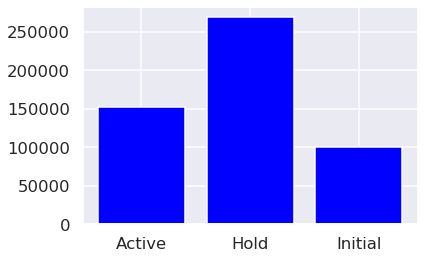

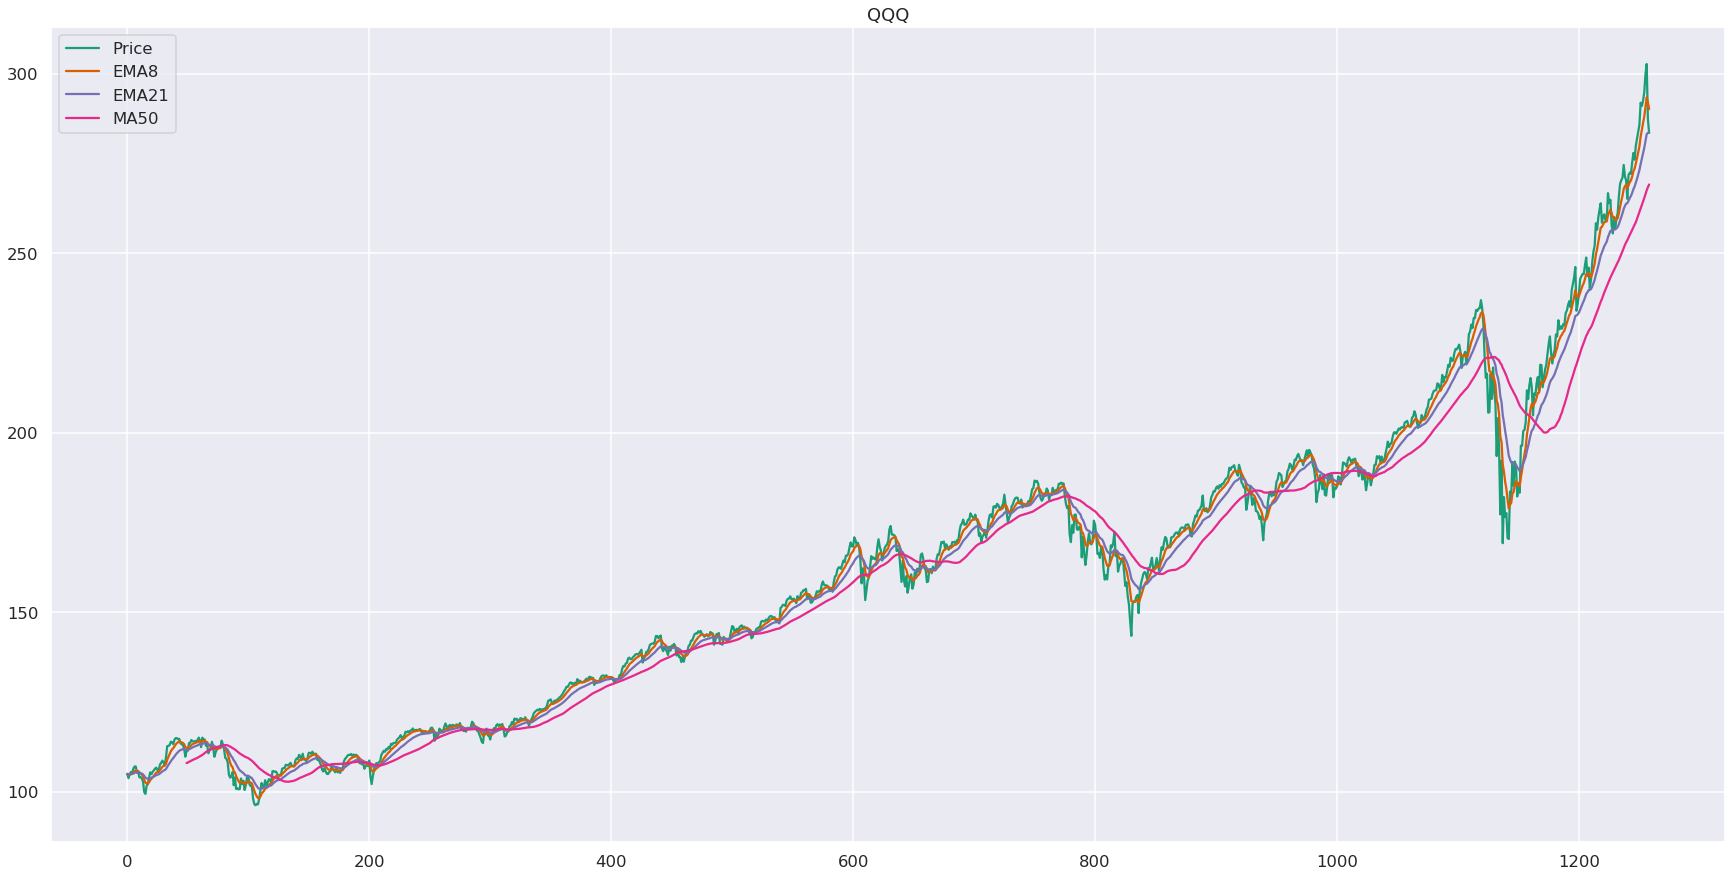

Active Short Term:  162652.73  Initial Fund:  100000
Buy and Hold:  254192.630144


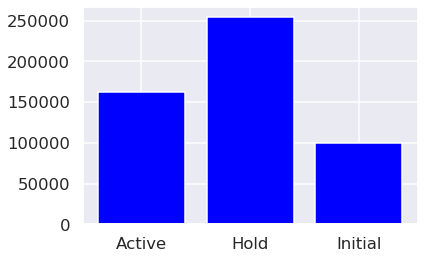

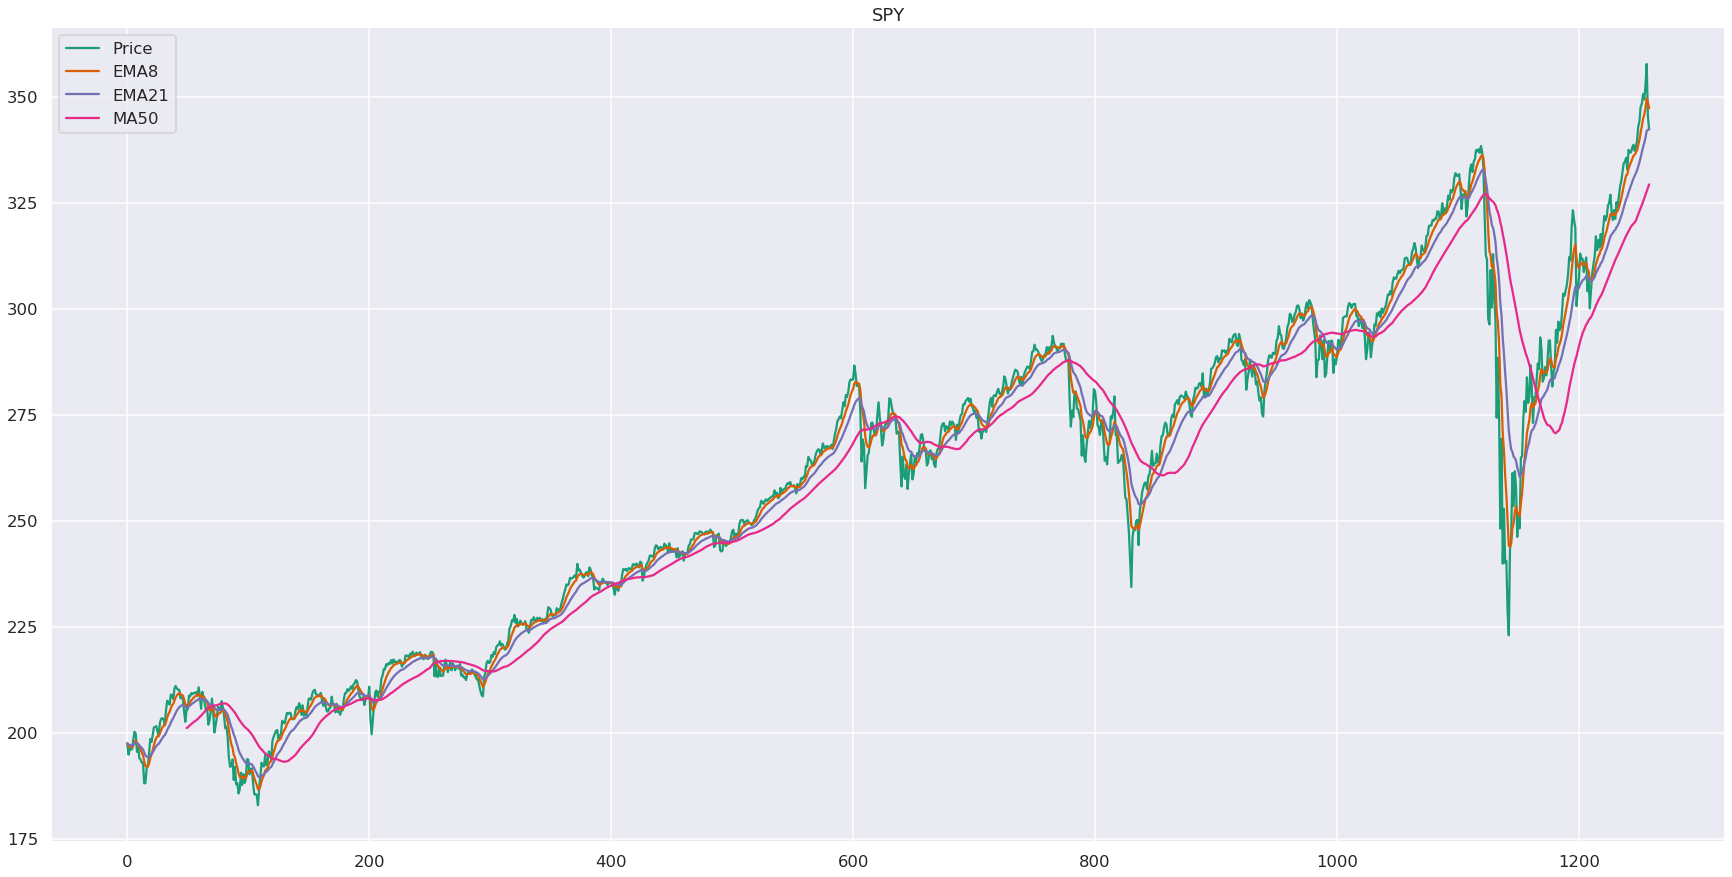

Active Short Term:  161009.68  Initial Fund:  100000
Buy and Hold:  166523.68243


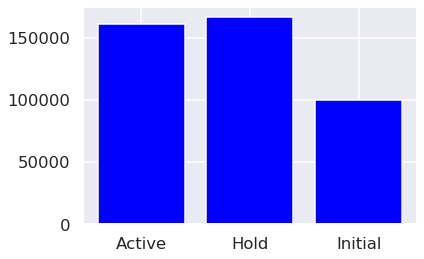

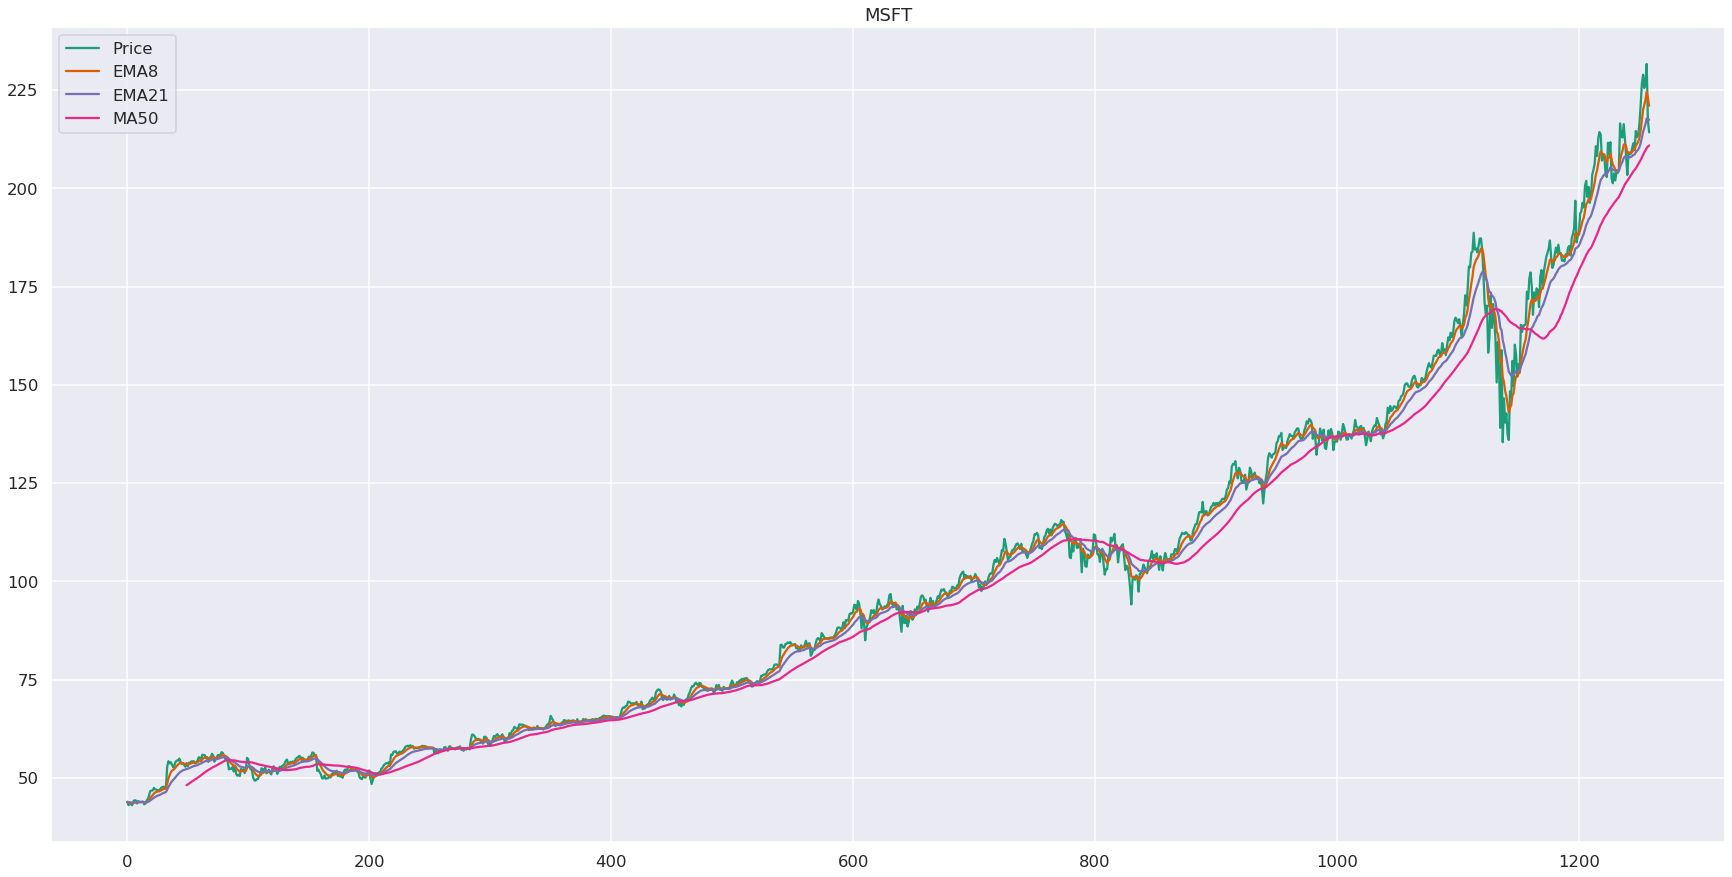

Active Short Term:  168384.08  Initial Fund:  100000
Buy and Hold:  388039.548189


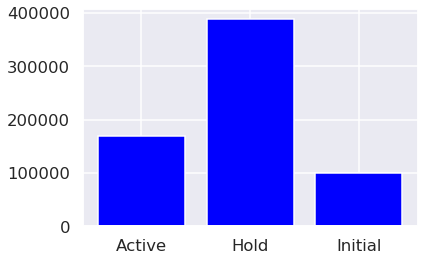

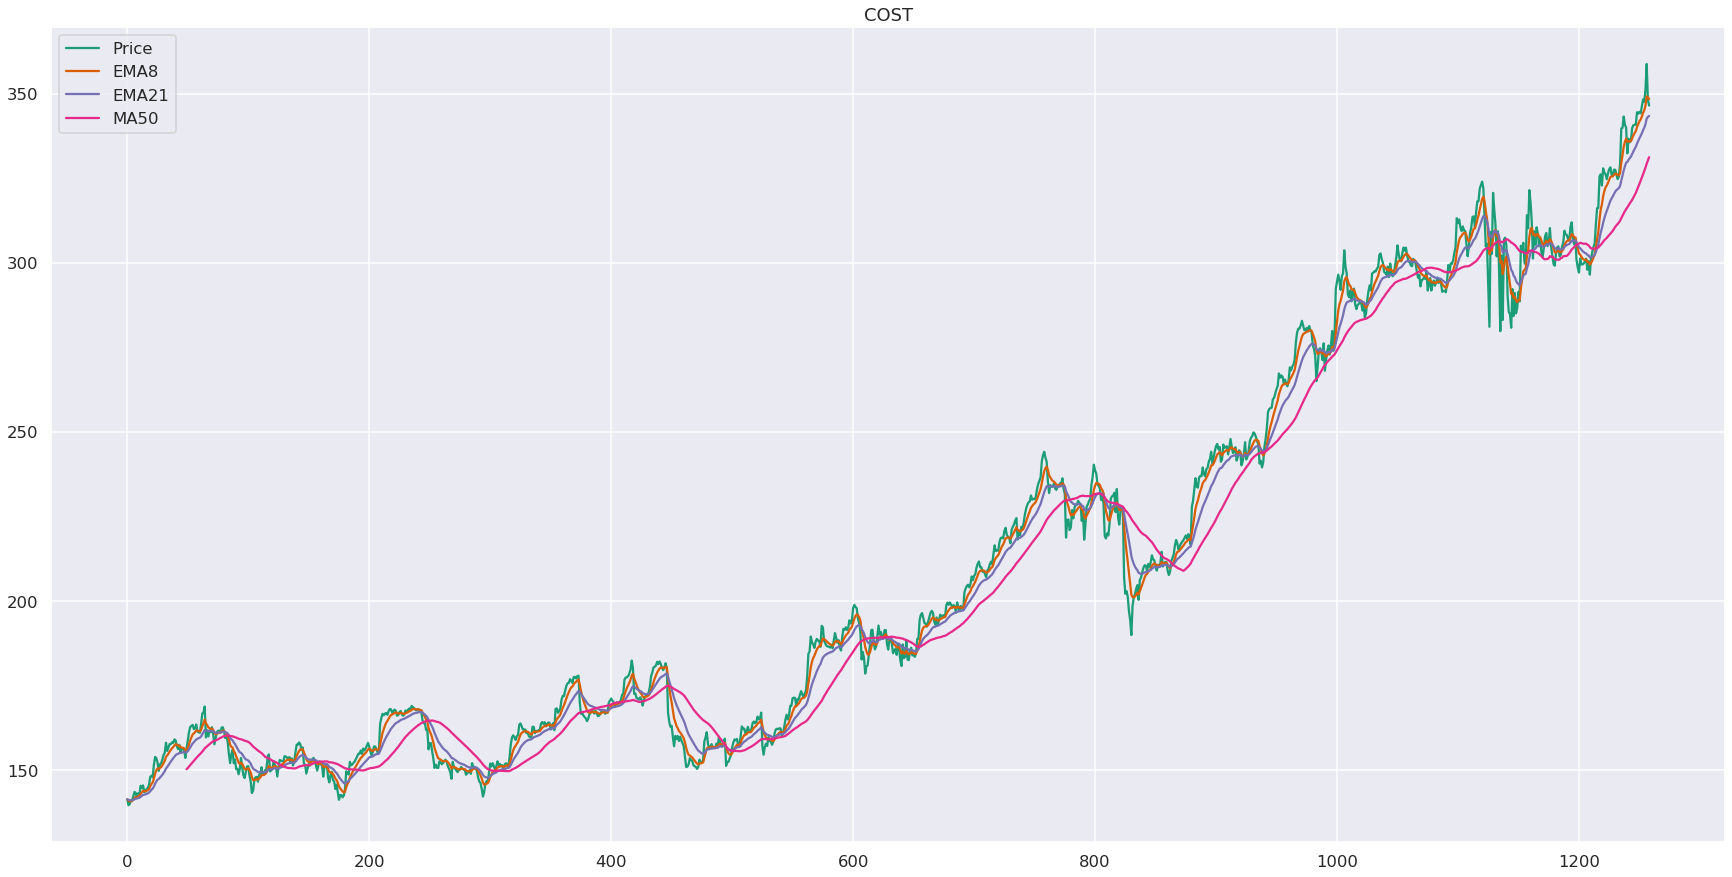

Active Short Term:  137435.41  Initial Fund:  100000
Buy and Hold:  221486.68639


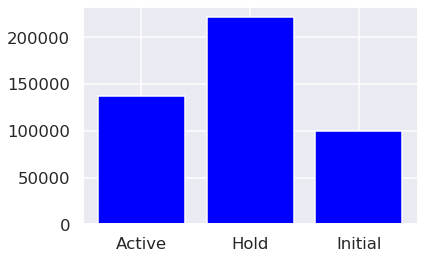

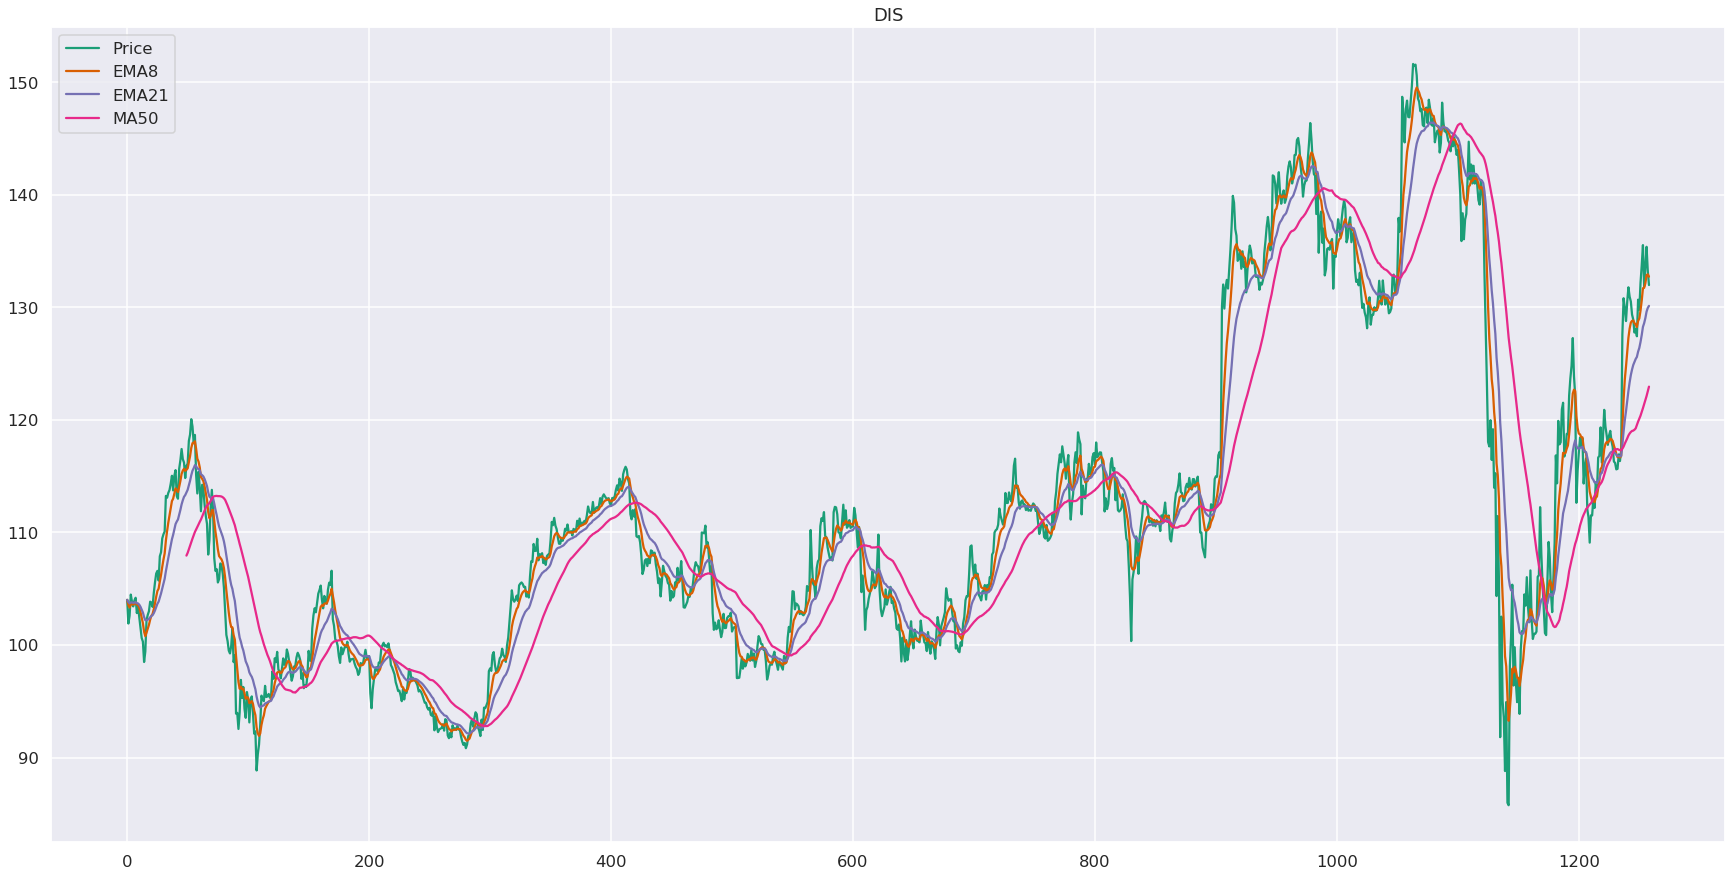

Active Short Term:  113208.3  Initial Fund:  100000
Buy and Hold:  113655.466888


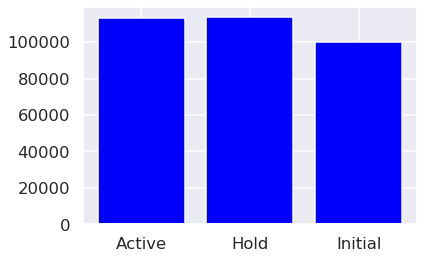

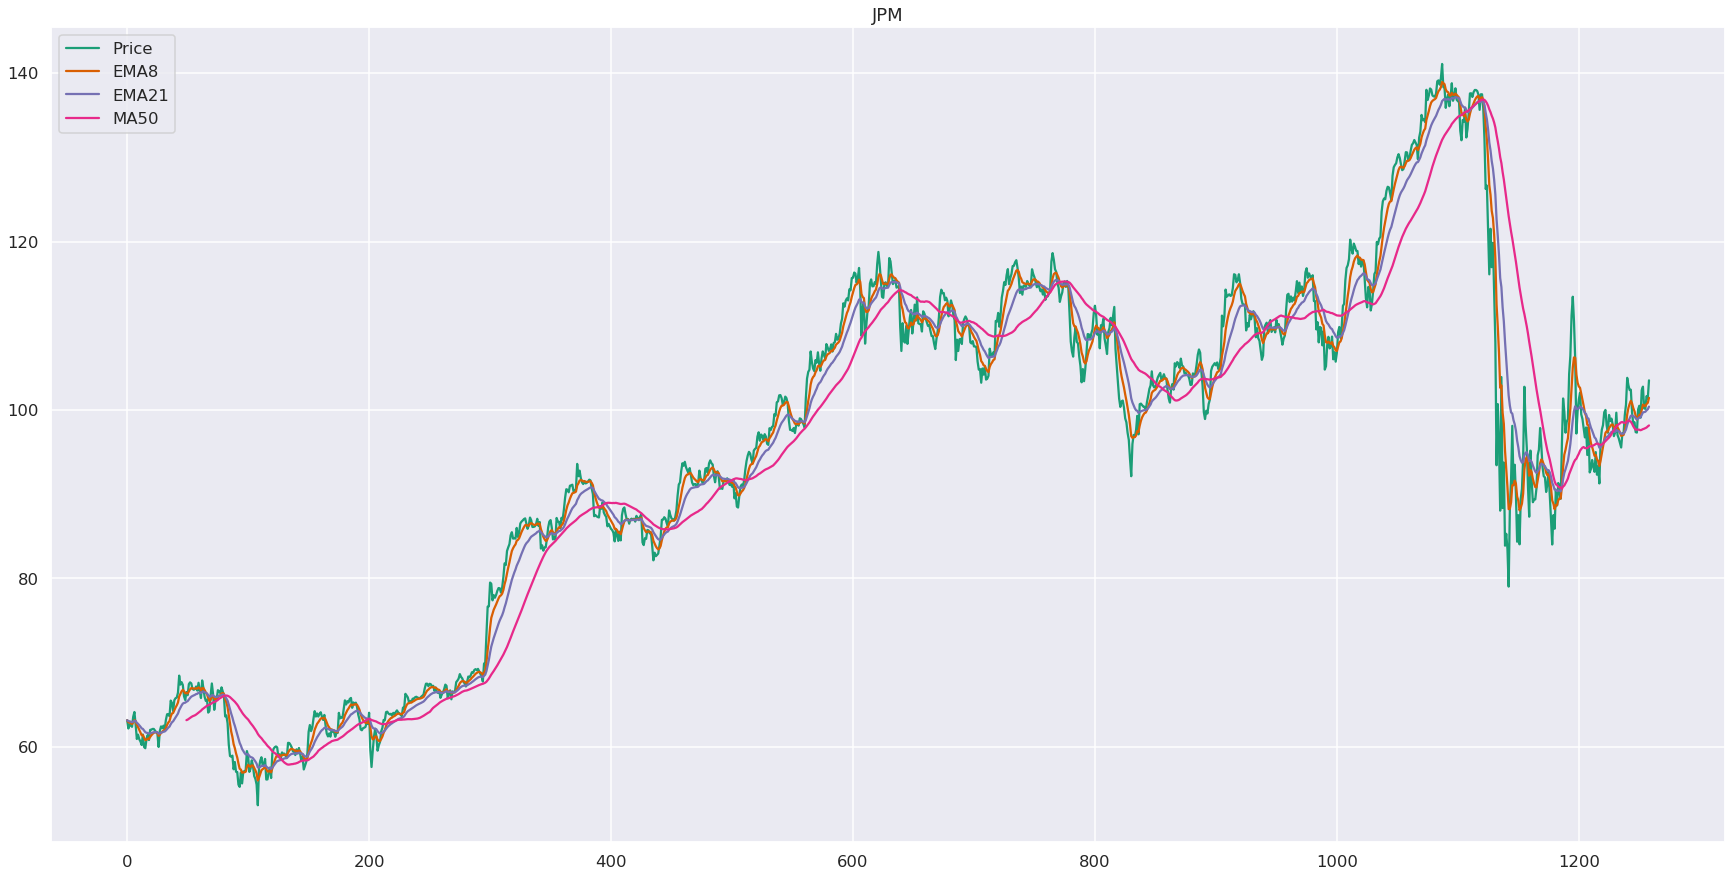

Active Short Term:  94026.68  Initial Fund:  100000
Buy and Hold:  156533.68


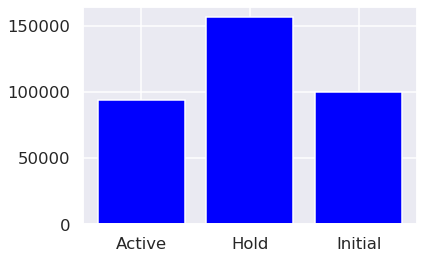

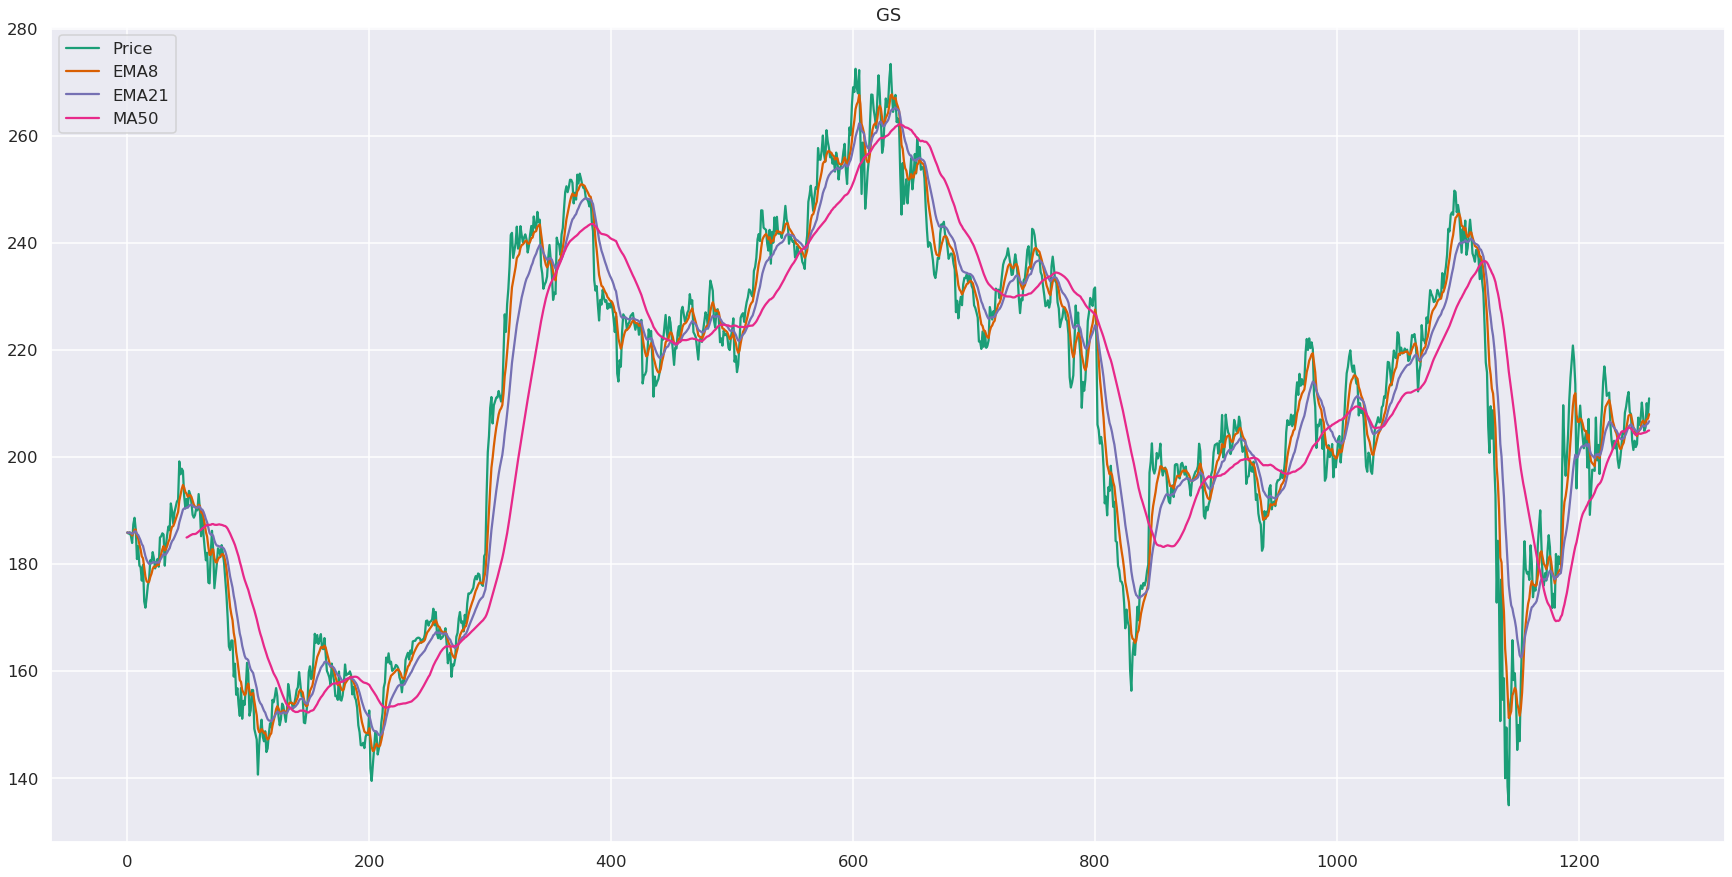

Active Short Term:  98965.16  Initial Fund:  100000
Buy and Hold:  110673.87738


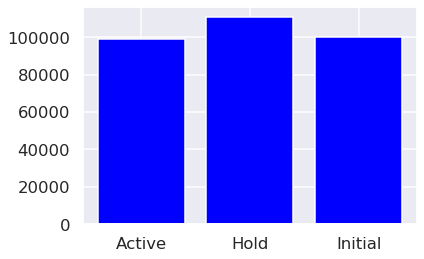

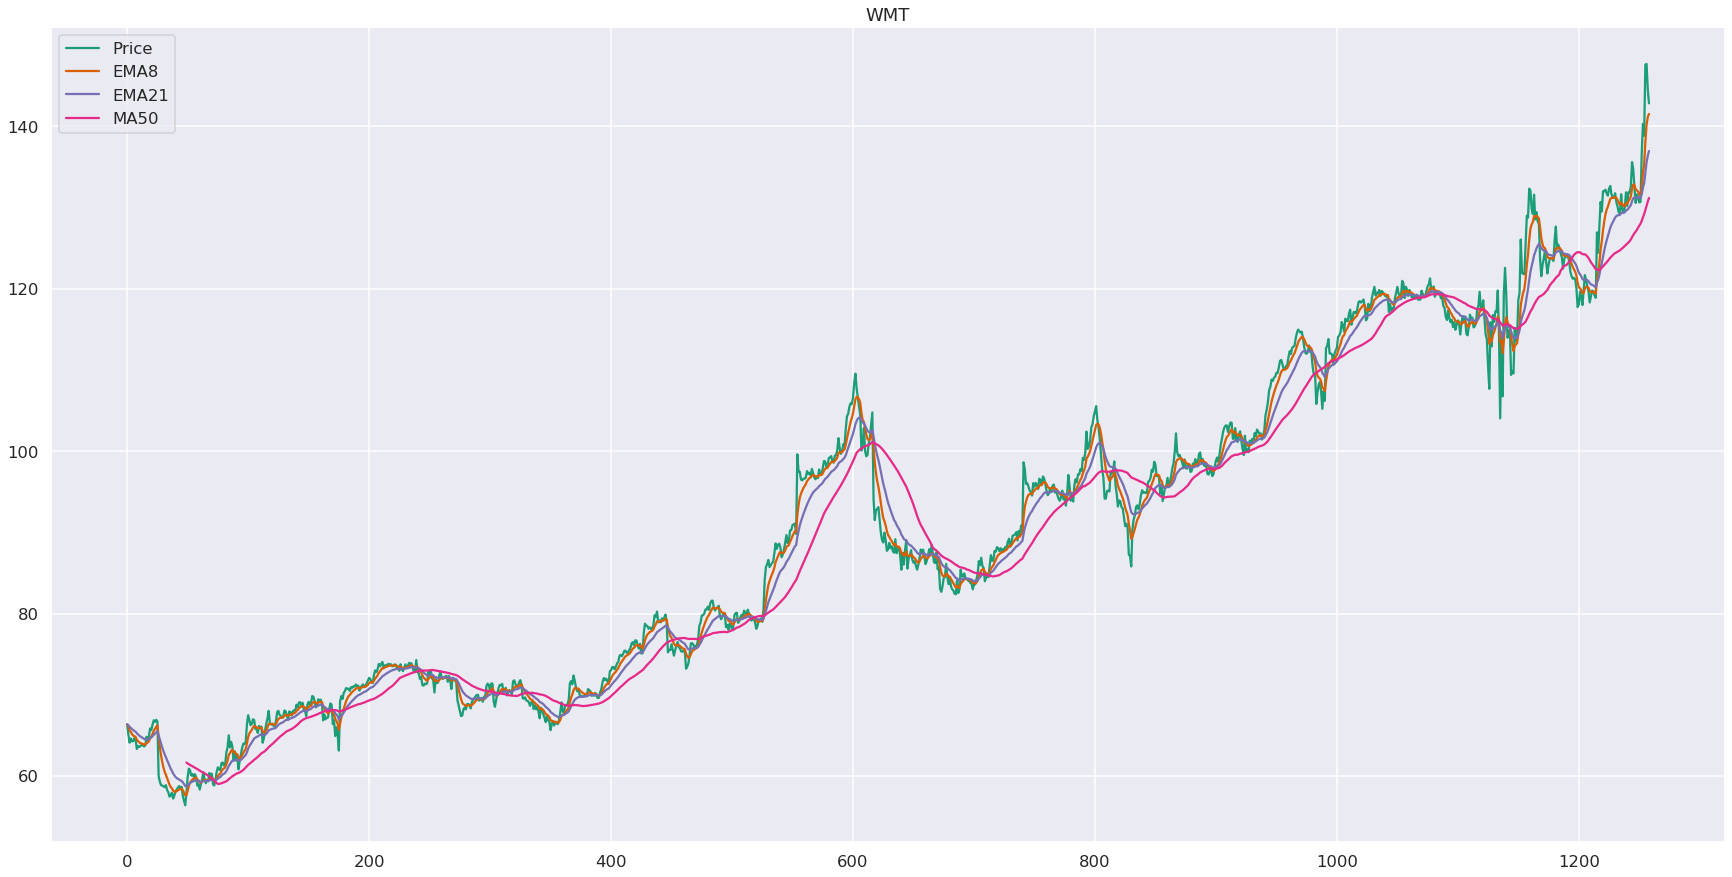

Active Short Term:  143138.66  Initial Fund:  100000
Buy and Hold:  235860.791651


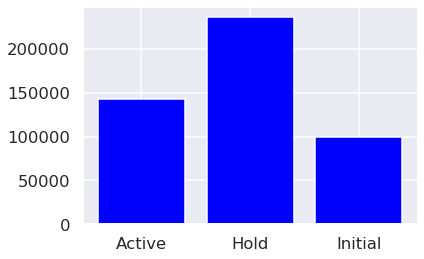

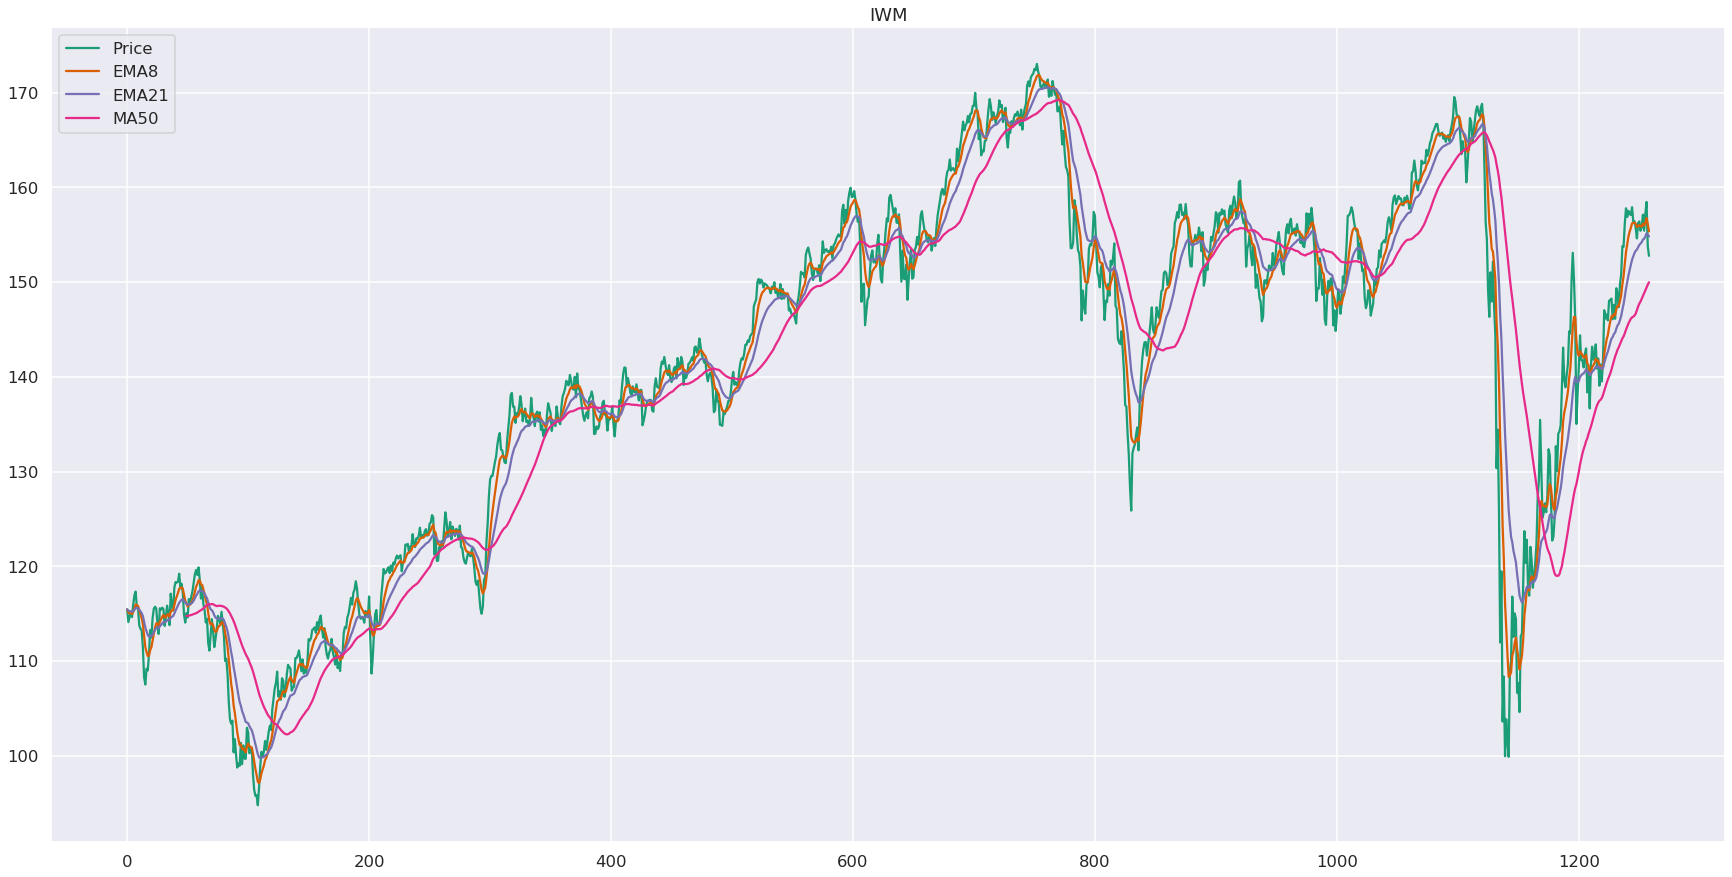

Active Short Term:  112360.21  Initial Fund:  100000
Buy and Hold:  129706.514245


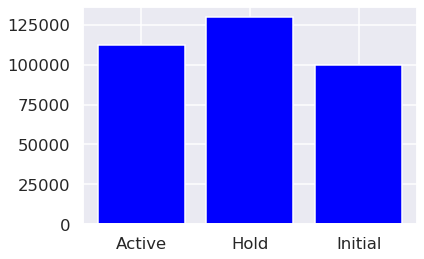

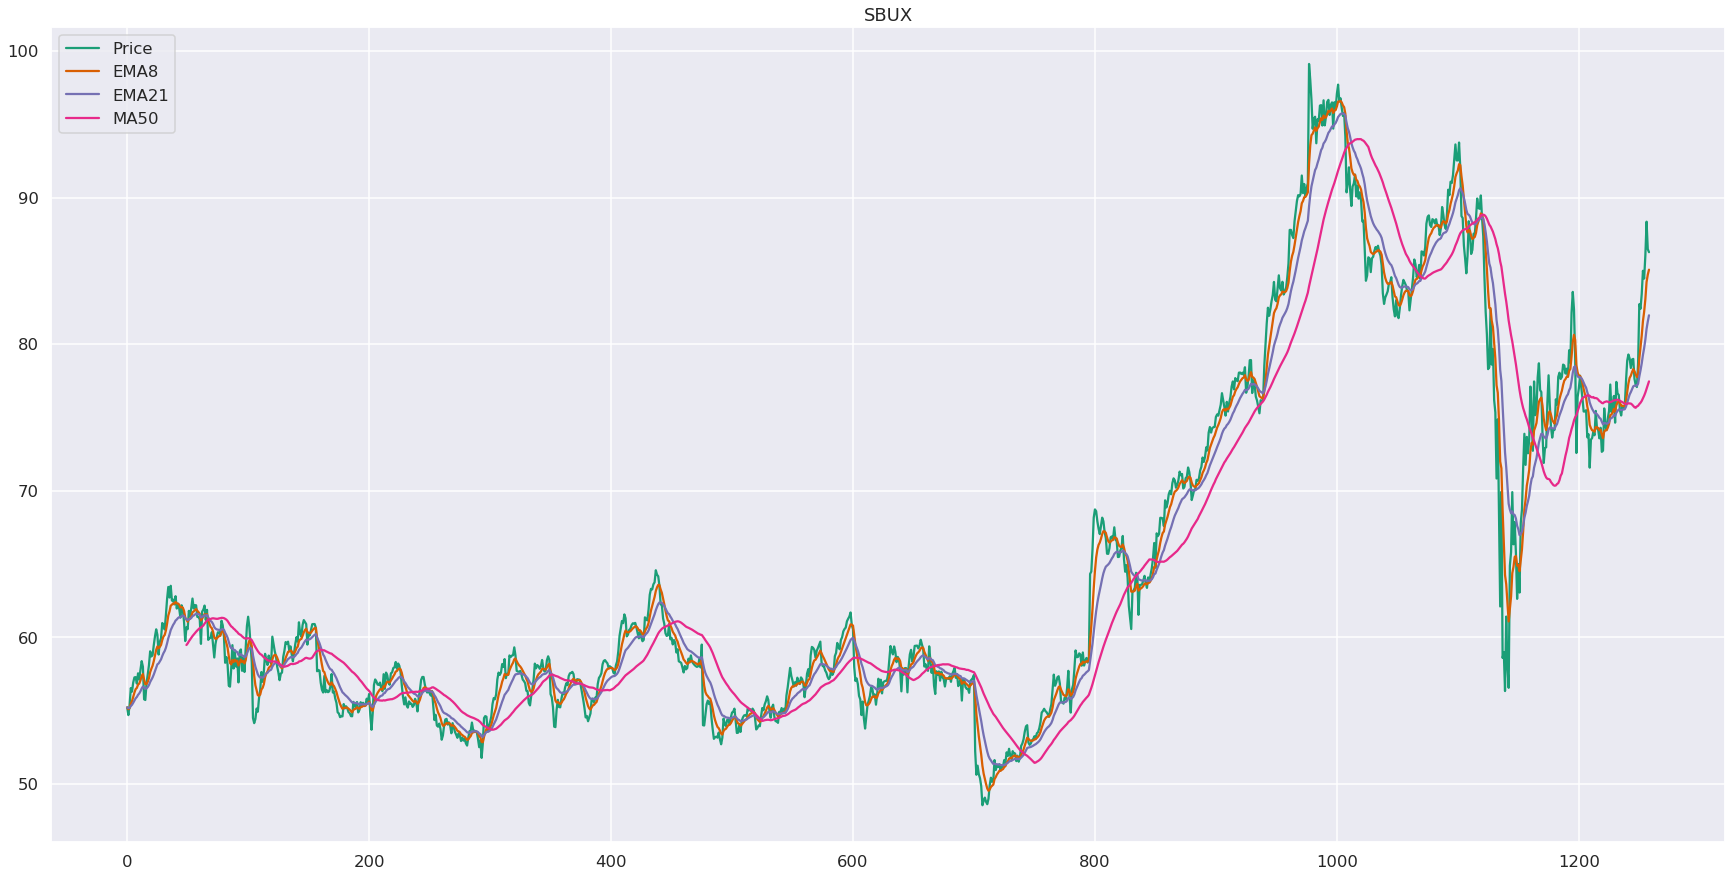

Active Short Term:  123203.54  Initial Fund:  100000
Buy and Hold:  140365.866746


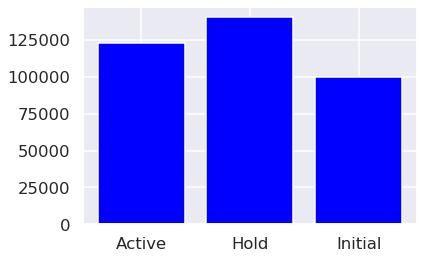

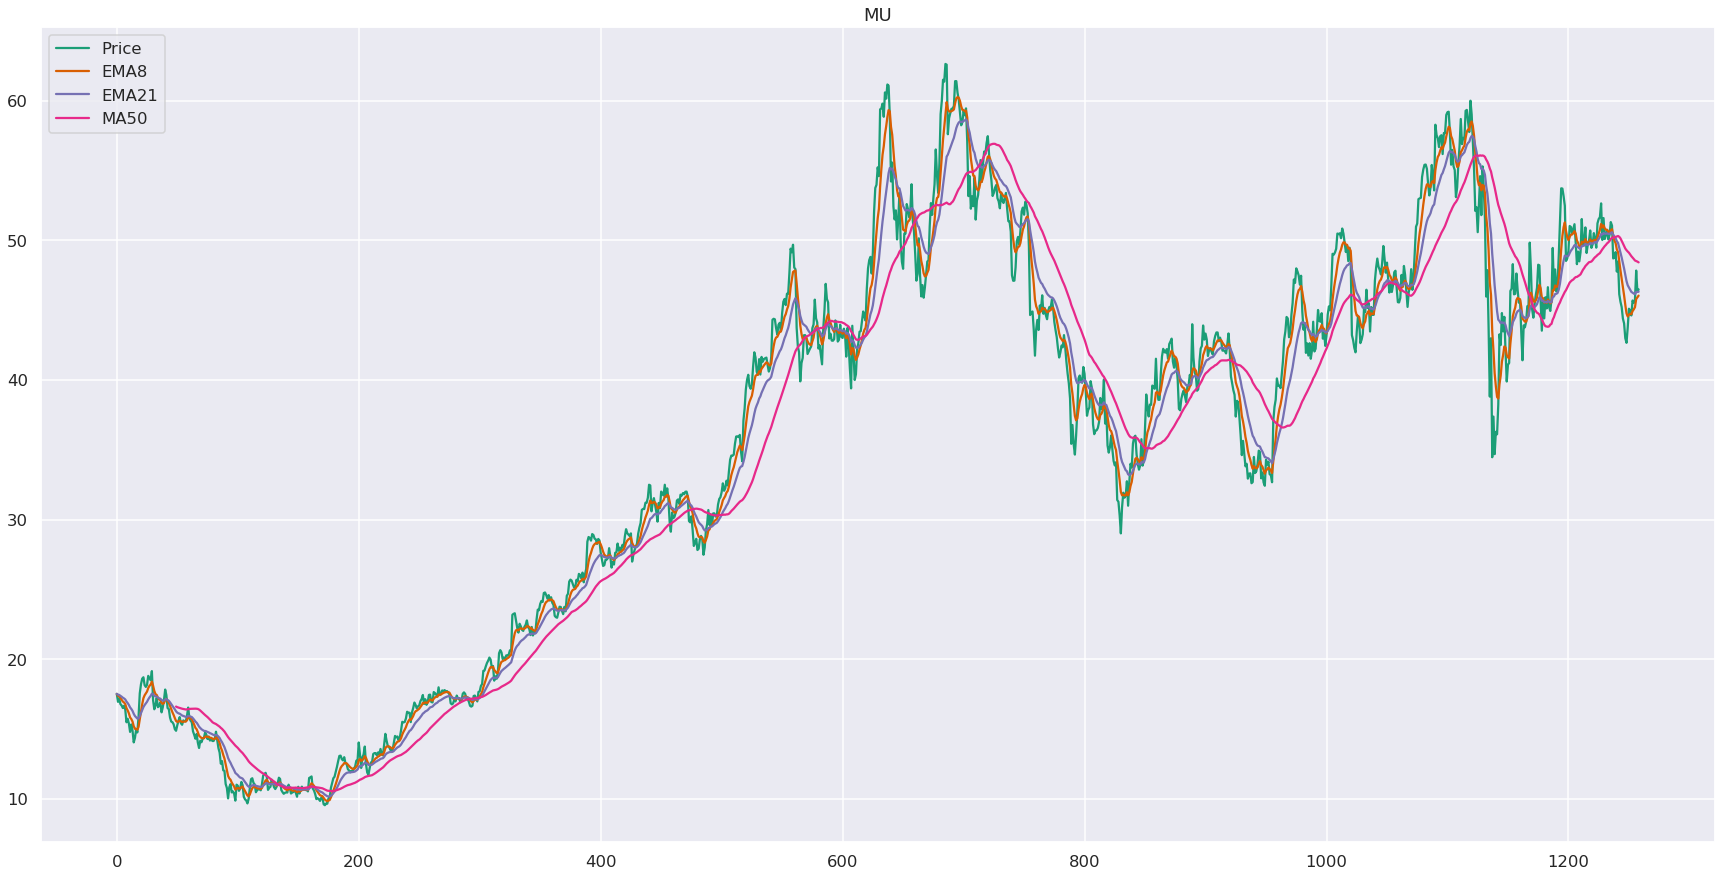

Active Short Term:  140853.12  Initial Fund:  100000
Buy and Hold:  386672.74


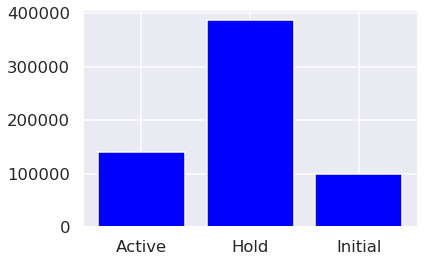

In [3]:
for d in os.listdir("Momentum"):
    trade(pd.read_csv("Momentum/" + d, delimiter=','), d.split(".")[0], "Momentum")

for d in os.listdir("Value"):
    trade(pd.read_csv("Value/" + d, delimiter=','), d.split(".")[0], "Value")